# **IoT Sensor Data Analysis and Cybersecurity Risk Assessment**

## **1. Introduction**
The rapid growth of **Internet of Things (IoT) networks** has enabled real-time monitoring of environmental conditions, industrial operations, and home automation. However, these systems remain vulnerable to cyber threats, particularly **Distributed Denial-of-Service (DDoS) attacks**, which can compromise data integrity and system availability.

This project focuses on:
**Environmental Analysis** → Understanding unique sensor characteristics  
**Sensor Correlations** → Identifying relationships between sensor readings   **Seasonality Analysis** → Detecting trends and variations in environmental conditions  
**Daily Trends** → Visualizing day-to-day sensor fluctuations  
**Cybersecurity Risk Assessment** → Evaluating vulnerabilities to DDoS and other threats  
**Mitigation Strategies** → Enhancing IoT security with **anomaly detection, IDS, and network hardening**  

By integrating **data-driven insights** and **cyber risk assessment**, this study aims to optimize **IoT sensor deployments, improve security measures, and enhance data reliability**.

---

## **2. IoT Sensor Data Overview**
The study analyzes data from **three IoT devices** deployed in different environments, each equipped with **seven sensors**:

| **Sensor Type** | **Description** |
|---------------|----------------|
| **Temperature** | Measures ambient temperature in °C |
| **Humidity** | Monitors moisture levels in the air |
| **CO (Carbon Monoxide)** | Detects CO levels to assess air quality |
| **LPG (Liquefied Petroleum Gas)** | Monitors potential gas leaks |
| **Smoke** | Detects smoke particles indicating fire risks |
| **Light** | Measures light intensity |
| **Motion** | Detects movement in the monitored area |

Each device provides **real-time readings**, allowing for in-depth environmental monitoring and security assessment.

---

## **3. Time Series Analysis and Anomaly Detection**
### **3.1 Temperature Prediction and Anomaly Detection**
This section performs **time series forecasting** and **anomaly detection** on IoT telemetry data:
- **Data Loading and Preprocessing:** Loads IoT telemetry data, sorts it by timestamp, and scales the relevant features (humidity, CO, LPG, smoke, and temperature).
- **Dataset Creation:** Uses a custom PyTorch dataset (`TimeSeriesDataset`) to prepare sequences of input features (excluding temperature) to predict the next temperature value.
- **Model Definition:** Implements a transformer-based model (`TransformerTimeSeries`) for temperature prediction.
- **Training and Prediction:** Trains the model using prepared data and predicts temperature values on the test set.
- **Inverse Transformation:** Converts predictions back to their original scale.
- **Visualization and Anomaly Detection:** Plots predictions vs. actual values and detects anomalies based on deviations beyond a threshold.

---

## **4. Correlation Analysis**
### **4.1 Discovering Sensor Relationships**
By analyzing relationships between sensor data, we can uncover dependencies:
- **Temperature & Humidity** → Warmer temperatures often lead to higher humidity levels.
- **CO & LPG** → Industrial areas may show simultaneous increases in **CO and LPG concentrations**.
- **Light & Motion** → Higher light intensity correlates with **increased motion detection** in occupied spaces.

**Methods Used**:  
 **Pearson Correlation Coefficients** → Measure linear relationships  
 **Heatmaps** → Visualize sensor interdependencies  

---

## **5. Network Intrusion Detection System (NIDS) Analysis**
This section evaluates network security threats by analyzing **network attack data**:
- **Data Loading (in chunks):** Reads large network traffic data in chunks to optimize memory usage.
- **Box Plots:** Visualizes distributions of numerical features to detect outliers.
- **Data Filtering:** Selects specific attacks (`mirai` and `gafgyt`) and limits samples to 2000 instances each.
- **Label Encoding:** Converts categorical features (`Attack` types) into numerical representations for ML models.
- **Regression Model (Linear Regression):** Attempts to predict attack types using linear regression (though the missing library prevents execution).
- **Pie Charts:** Displays category distributions of various attack types.
- **Heatmap (Attack vs. Sub-Attack):** Maps relationships between `Attack` and `Attack_SubType`.
- **Outlier Detection (Z-score):** Identifies outliers in network traffic using **Z-score thresholding**.
- **Visualization of Attack Labels:** Plots top attack sub-types based on occurrence frequency.

---

## **6. Cybersecurity Risk Assessment**
### **6.1 Identifying Cybersecurity Risks in IoT Devices**
IoT sensors are vulnerable to **DDoS attacks, data spoofing, and unauthorized access**. The following risks were assessed:

| **Cyber Threat** | **Impact on IoT Sensors** |
|-----------------|--------------------------|
| **DDoS Attack** | Overloads the network, causing **data delays and loss** |
| **Data Spoofing** | Attackers inject fake sensor data, affecting **system decisions** |
| **Unauthorized Access** | Hackers gain control over IoT devices, causing potential **shutdowns** |

---

## **7. Mitigation Strategies for IoT Security**
### **7.1 Defending Against DDoS and Other Attacks**
Based on the cyber risk assessment, we propose the following **security enhancements**:

| **Mitigation Strategy** | **Implementation** |
|-------------------------|------------------|
| **Intrusion Detection System (IDS)** | Detects unusual traffic spikes indicative of a **DDoS attack** |
| **Anomaly Detection Models** | Uses **ML-based algorithms** to identify irregular sensor readings |
| **Edge Computing** | Processes sensor data **locally** to reduce network dependency |
| **Secure Authentication** | Implements **strong encryption and authentication** to prevent unauthorized access |

---

# **Data Processing Step**

In [2]:


from google.colab import drive
drive.mount('/content/drive')

import numpy as np #
import pandas as pd #
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
import os


data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AAI-530/iot_telemetry_data.csv', engine='python')
print(data.head())

Mounted at /content/drive
             ts             device        co   humidity  light       lpg  \
0  1.594512e+09  b8:27:eb:bf:9d:51  0.004956  51.000000  False  0.007651   
1  1.594512e+09  00:0f:00:70:91:0a  0.002840  76.000000  False  0.005114   
2  1.594512e+09  b8:27:eb:bf:9d:51  0.004976  50.900000  False  0.007673   
3  1.594512e+09  1c:bf:ce:15:ec:4d  0.004403  76.800003   True  0.007023   
4  1.594512e+09  b8:27:eb:bf:9d:51  0.004967  50.900000  False  0.007664   

   motion     smoke       temp  
0   False  0.020411  22.700000  
1   False  0.013275  19.700001  
2   False  0.020475  22.600000  
3   False  0.018628  27.000000  
4   False  0.020448  22.600000  


In [3]:

print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
ts          0
device      0
co          0
humidity    0
light       0
lpg         0
motion      0
smoke       0
temp        0
dtype: int64


In [4]:
# Basic information about the dataset
print("\nDataset Info:")
data.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405184 entries, 0 to 405183
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ts        405184 non-null  float64
 1   device    405184 non-null  object 
 2   co        405184 non-null  float64
 3   humidity  405184 non-null  float64
 4   light     405184 non-null  bool   
 5   lpg       405184 non-null  float64
 6   motion    405184 non-null  bool   
 7   smoke     405184 non-null  float64
 8   temp      405184 non-null  float64
dtypes: bool(2), float64(6), object(1)
memory usage: 22.4+ MB


'light' and 'motion' are transformed to  0 and 1.

In [5]:
# Transforming boolean columns 'light' and 'motion' into integers
data['light'] = data['light'].astype(int)
data['motion'] = data['motion'].astype(int)

# convert unix time to time of day
from datetime import datetime, timedelta
start = datetime(1970, 1, 1)  # Unix epoch start time
data['datetime'] = data.ts.apply(lambda x: start + timedelta(seconds=x))
data = data.drop('ts', axis=1)

# Convert the 'datetime' column to a datetime object, and make datetime column into index column for convenience
data['datetime'] = pd.to_datetime(data['datetime'])
data.set_index('datetime', inplace=True)
data.head(5)

,device,co,humidity,light,lpg,motion,smoke,temp
datetime,,,,,,,,
2020-07-12 00:01:34.385975,b8:27:eb:bf:9d:51,0.004956,51.000000,0,0.007651,0,0.020411,22.700000
2020-07-12 00:01:34.735568,00:0f:00:70:91:0a,0.002840,76.000000,0,0.005114,0,0.013275,19.700001
2020-07-12 00:01:38.073573,b8:27:eb:bf:9d:51,0.004976,50.900000,0,0.007673,0,0.020475,22.600000
2020-07-12 00:01:39.589146,1c:bf:ce:15:ec:4d,0.004403,76.800003,1,0.007023,0,0.018628,27.000000
2020-07-12 00:01:41.761235,b8:27:eb:bf:9d:51,0.004967,50.900000,0,0.007664,0,0.020448,22.600000


In [6]:
# Grouping data by 'device' and creating a separate DataFrame for each device
device_groups = data.groupby('device')

# Dictionary to store each device's DataFrame
device_df = {}

for device, group in device_groups:
    device_df[device] = group

# **Data Overview**

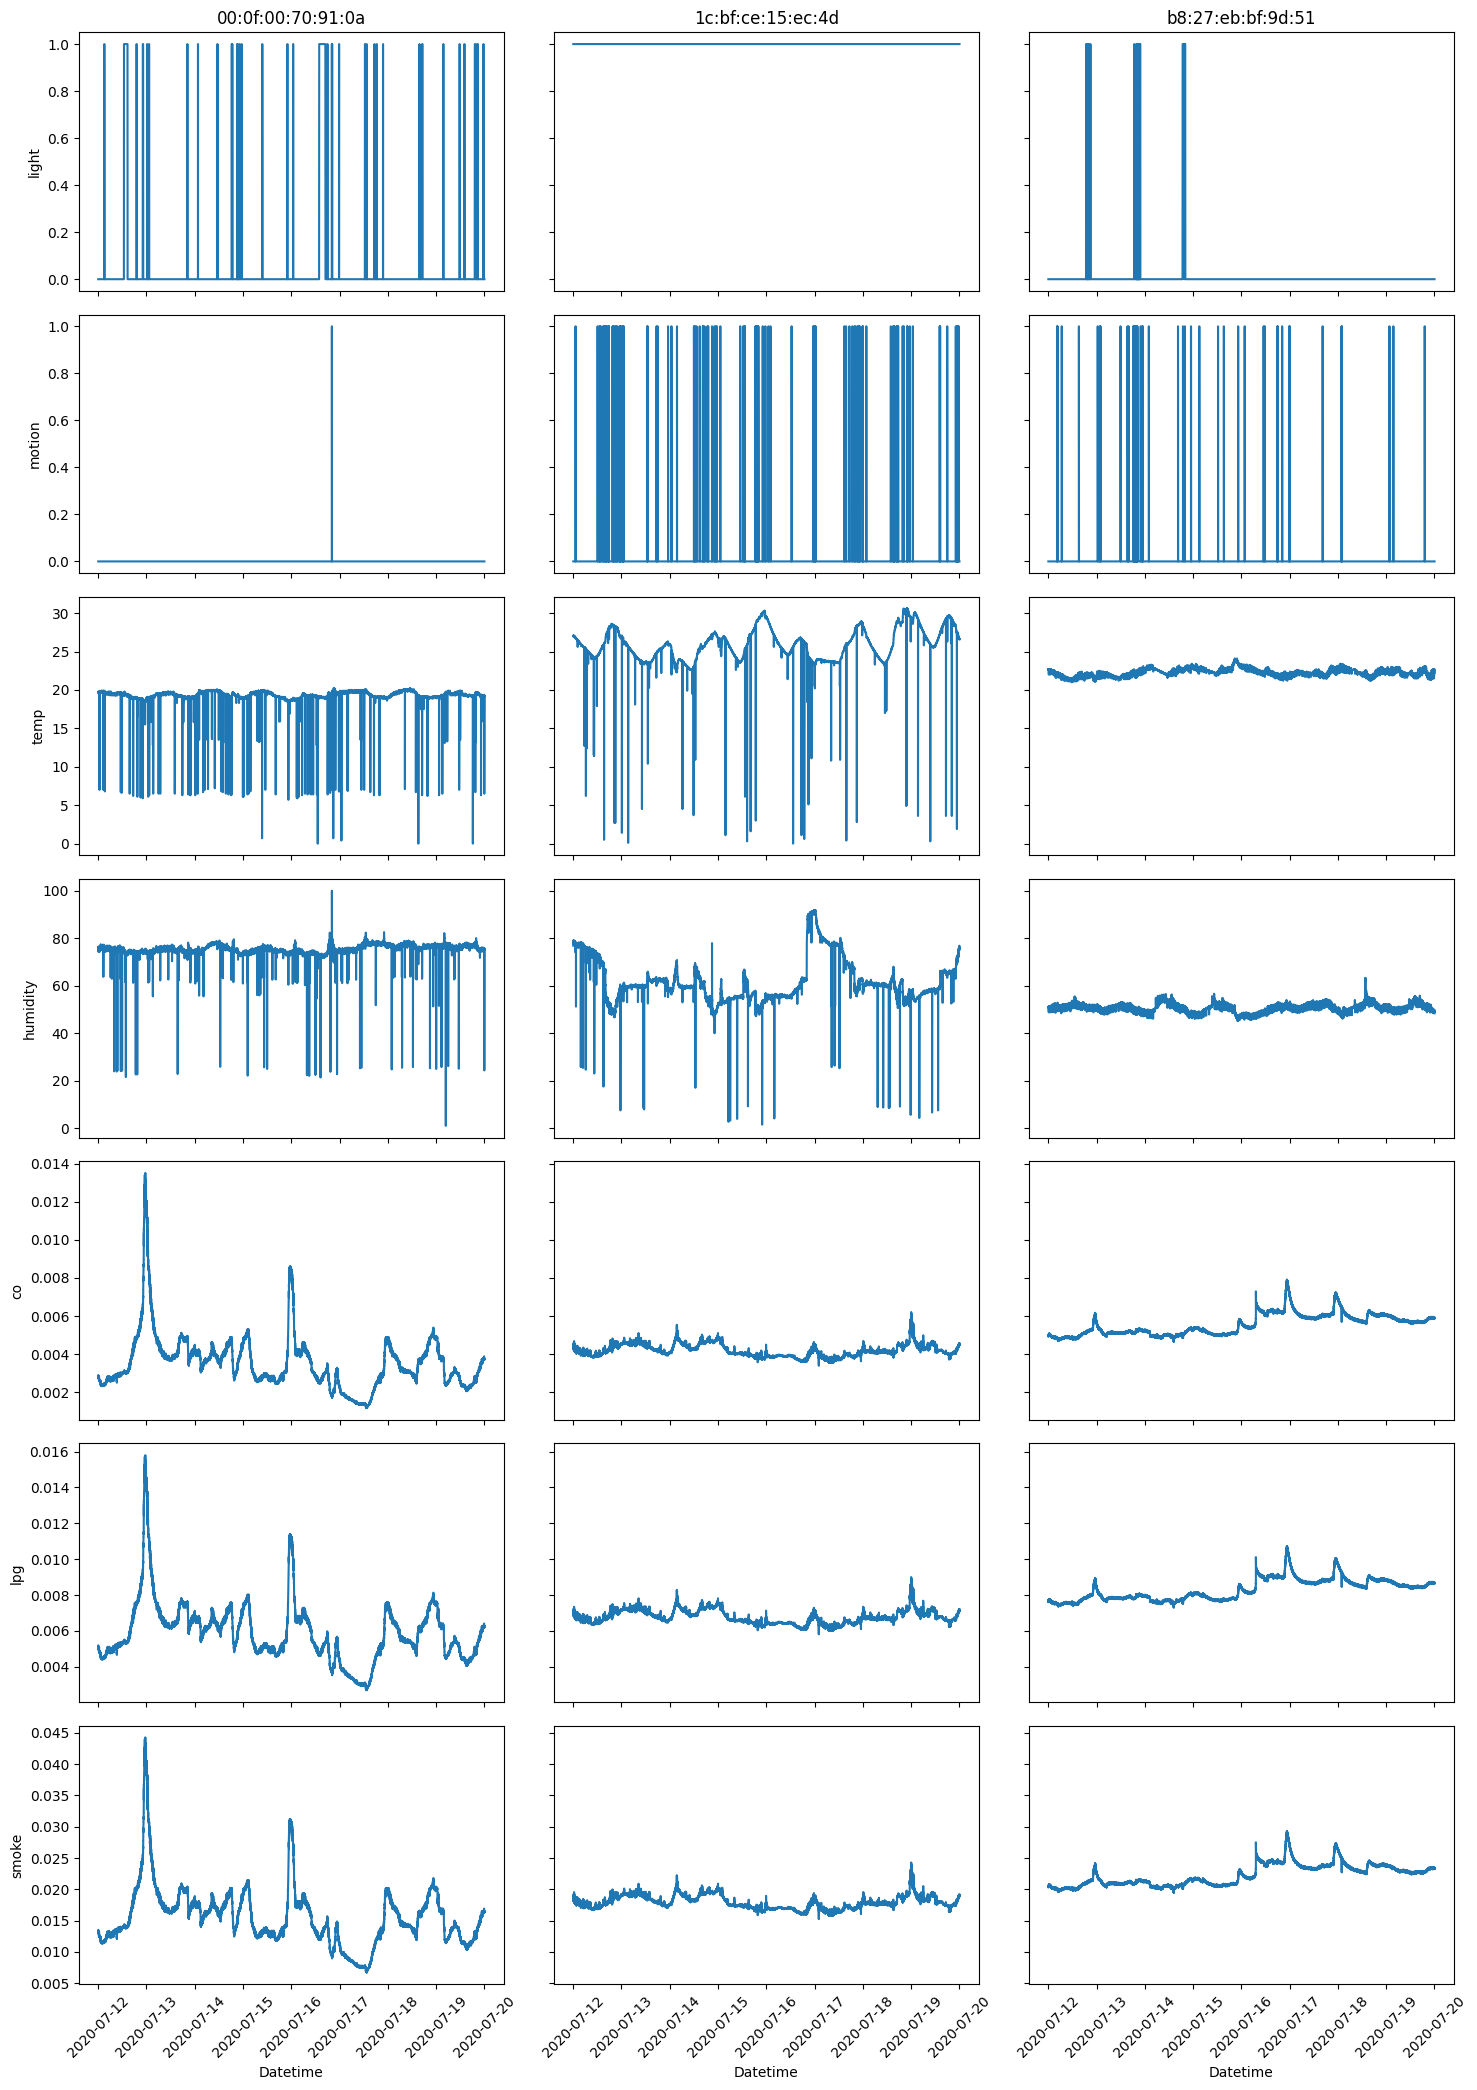

In [7]:
def plot_device_sensors(device_df, undersample_rate=1):


    # Sensors in the desired order
    sensors = ['light', 'motion', 'temp', 'humidity', 'co', 'lpg', 'smoke']

    # Number of devices and sensors
    num_devices = len(device_df)
    num_sensors = len(sensors)

    # Create a figure with subplots
    fig, axes = plt.subplots(nrows=num_sensors, ncols=num_devices, figsize=(num_devices * 5, num_sensors * 3), sharex='col', sharey='row')

    # Iterate through each device and sensor
    for j, (device_id, df) in enumerate(device_df.items()):
        # Undersample the data
        df_undersampled = df.iloc[::undersample_rate, :]

        for i, sensor in enumerate(sensors):
            # Plot each sensor in a separate subplot
            sns.lineplot(data=df_undersampled, x=df_undersampled.index, y=sensor, ax=axes[i, j])
            axes[i, j].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

            # Set x and y labels
            if j == 0:  # Only set y-axis label for the first column
                axes[i, j].set_ylabel(sensor)
            if i == num_sensors - 1:  # Only set x-axis label for the bottom row
                axes[i, j].set_xlabel('Datetime')
            else:
                axes[i, j].set_xlabel('')

            # Set titles for the first row and first column
            if i == 0:
                axes[i, j].set_title(device_id)

    plt.tight_layout()
    plt.show()

plot_device_sensors(device_df, undersample_rate=2)

## **Removing redundancies**
CO, lpg, and smoke readout are highly correlated.
correlation matrix to verify this observation.

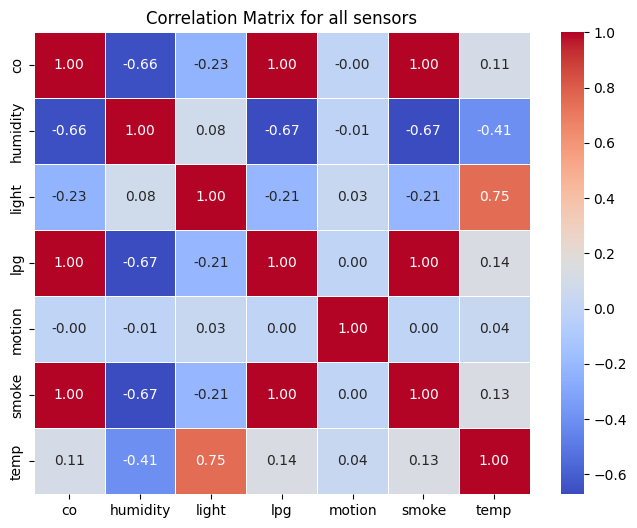

In [ ]:
# Drop the sensor column
corr_data = data.drop(['device'],axis=1)

# Compute the correlation matrix
corr_matrix = corr_data.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix for all sensors')
plt.show()

 # **Removed lpg and smoke as they do not provide new information and kept only CO**

In [ ]:
# Iterating through the dictionary and removing 'lpg' and 'smoke' columns
for device_id, df in device_df.items():
    device_df[device_id] = df.drop(columns=['lpg', 'smoke'])

device_df

{'00:0f:00:70:91:0a':                                        device        co   humidity  light  \
 datetime                                                                    
 2020-07-12 00:01:34.735568  00:0f:00:70:91:0a  0.002840  76.000000      0   
 2020-07-12 00:01:46.869076  00:0f:00:70:91:0a  0.002938  76.000000      0   
 2020-07-12 00:02:02.785732  00:0f:00:70:91:0a  0.002905  75.800003      0   
 2020-07-12 00:02:11.476376  00:0f:00:70:91:0a  0.002938  75.800003      0   
 2020-07-12 00:02:15.289086  00:0f:00:70:91:0a  0.002840  76.000000      0   
 ...                                       ...       ...        ...    ...   
 2020-07-20 00:03:16.329782  00:0f:00:70:91:0a  0.003745  75.300003      0   
 2020-07-20 00:03:20.684223  00:0f:00:70:91:0a  0.003745  75.400002      0   
 2020-07-20 00:03:25.039890  00:0f:00:70:91:0a  0.003745  75.400002      0   
 2020-07-20 00:03:33.162015  00:0f:00:70:91:0a  0.003745  75.300003      0   
 2020-07-20 00:03:36.979522  00:0f:00:70:91

## **Step Determine sampling rates for performing analysis - seasonal and daily trend**


In [ ]:
# Function that calculate the sampling rate
def calculate_sampling_stats(device_df):
    sampling_stats = {}

    for device_id, df in device_df.items():
        # Calculate time differences between consecutive data points
        time_diffs = df.index.to_series().diff().dropna()

        # Convert time differences to a consistent unit, e.g., seconds
        time_diffs_in_seconds = time_diffs.dt.total_seconds()

        # Calculate mean and standard deviation
        mean_sampling_rate = time_diffs_in_seconds.mean()
        std_sampling_rate = time_diffs_in_seconds.std()

        # Store in dictionary
        sampling_stats[device_id] = {'mean': mean_sampling_rate, 'std': std_sampling_rate}

    return sampling_stats

# Calculate sampling stats for each device
device_sampling_stats = calculate_sampling_stats(device_df)
for device, stats in device_sampling_stats.items():
    print(f"Device {device} - Mean Sampling Rate: {stats['mean']}s, Std Dev: {stats['std']}s")

Device 00:0f:00:70:91:0a - Mean Sampling Rate: 6.182787879460532s, Std Dev: 2.5363540690275266s
Device 1c:bf:ce:15:ec:4d - Mean Sampling Rate: 6.526965254047981s, Std Dev: 3.0185357592392035s
Device b8:27:eb:bf:9d:51 - Mean Sampling Rate: 3.6880388281568415s, Std Dev: 0.052234523971958435s


# **Step Understand the Environmental Characteristics from the device sensors**

Temperature and Humidity of each device is calculated.

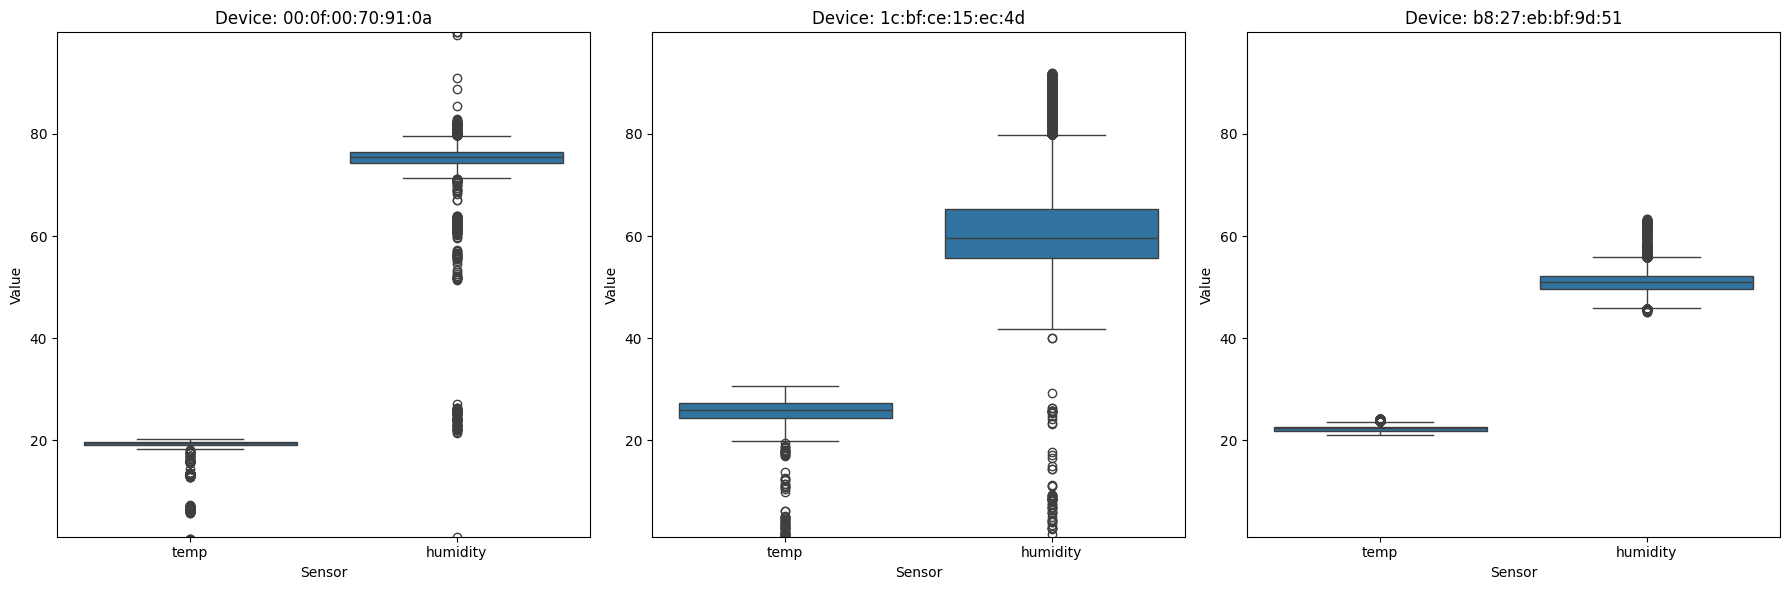

In [ ]:
def plot_sensor_boxplots(device_df, sensors=['temp', 'humidity']):
    """
    Plot sensors from each device with same y-axis scale.
    """

    num_devices = len(device_df)
    fig, axes = plt.subplots(nrows=1, ncols=num_devices, figsize=(num_devices * 6, 6))

    # Determine the global min and max values across all devices for each sensor
    global_min = {sensor: float('inf') for sensor in sensors}
    global_max = {sensor: float('-inf') for sensor in sensors}

    for df in device_df.values():
        for sensor in sensors:
            global_min[sensor] = min(global_min[sensor], df[sensor].min())
            global_max[sensor] = max(global_max[sensor], df[sensor].max())

    # Plot the box plots
    for j, (device_id, df) in enumerate(device_df.items()):
        data_to_plot = df[sensors].melt(var_name='Sensor', value_name='Value')
        sns.boxplot(x='Sensor', y='Value', data=data_to_plot, ax=axes[j])
        axes[j].set_title(f'Device: {device_id}')

        # Set the same y-axis limits for each subplot
        for i, sensor in enumerate(sensors):
            axes[j].set_ylim([global_min[sensor], global_max[sensor]])

    plt.tight_layout()
    plt.show()

plot_sensor_boxplots(device_df)

Device Name - '00:0f:00:70:91:0a
Device Name - '1c:bf:ce:15:ec:4d'
Device Name - 'b8:27:eb:bf:9d:51'

- **Device Mac :  '00:0f:00:70:91:0a (00)**
 This environment is cool and humid, indicative of a well-controlled indoor setting. Such conditions suggest a stable and consistent environmental control system.

- **Device  '1c:bf:ce:15:ec:4d'**
This environment is warm and moderately humid, with significant variation. The fluctuating readings indicate a less well-controlled environment, where temperature and humidity are subject to natural variations or human activity.

- **Device 'b8:27:eb:bf:9d:51' -**
This environment is warm and dry, and it also appears to be well-controlled. The consistent readings suggest an stable environmental control, similar to Device 00, but with a different temperature and humifty settings.



# **Step Extract (Moving Average) Frequency of the sensors from Binary Data**
motion and light sensor processing

Given the binary nature of this data, which does not readily convey the intensity of sensor activity,  rolling average is considered.

This approach will smooth out the data epochs, transforming the binary readouts into a more continuous and interpretable measure of sensor activity frequency.

**The rolling average (also known as the moving average) is a common technique used in time-series analysis to smooth out short-term fluctuations and highlight longer-term trends or cycles. For a time-series dataset**


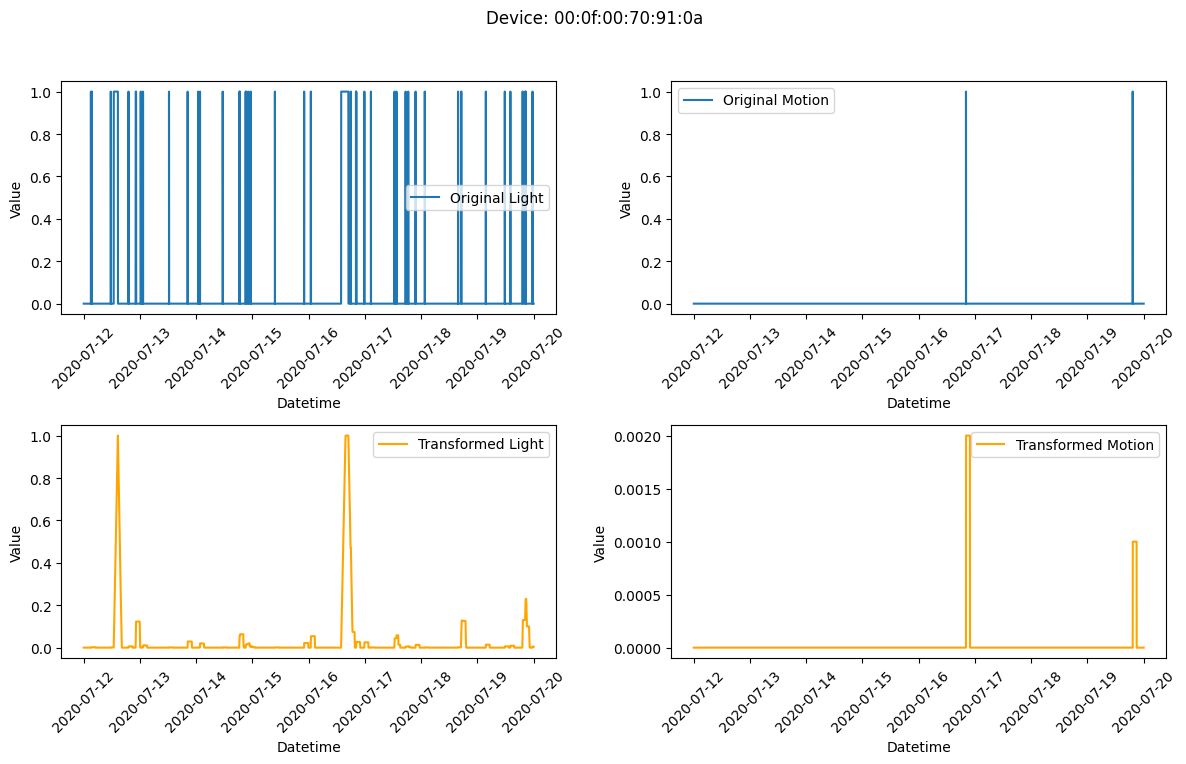

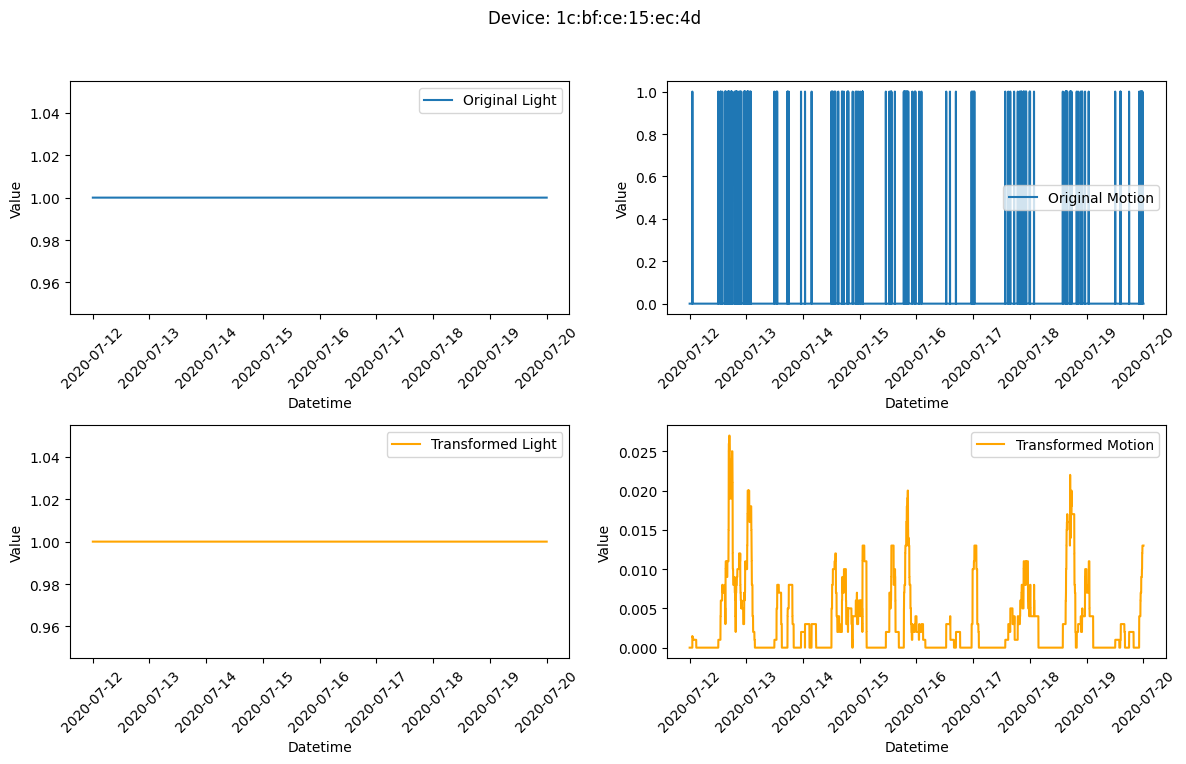

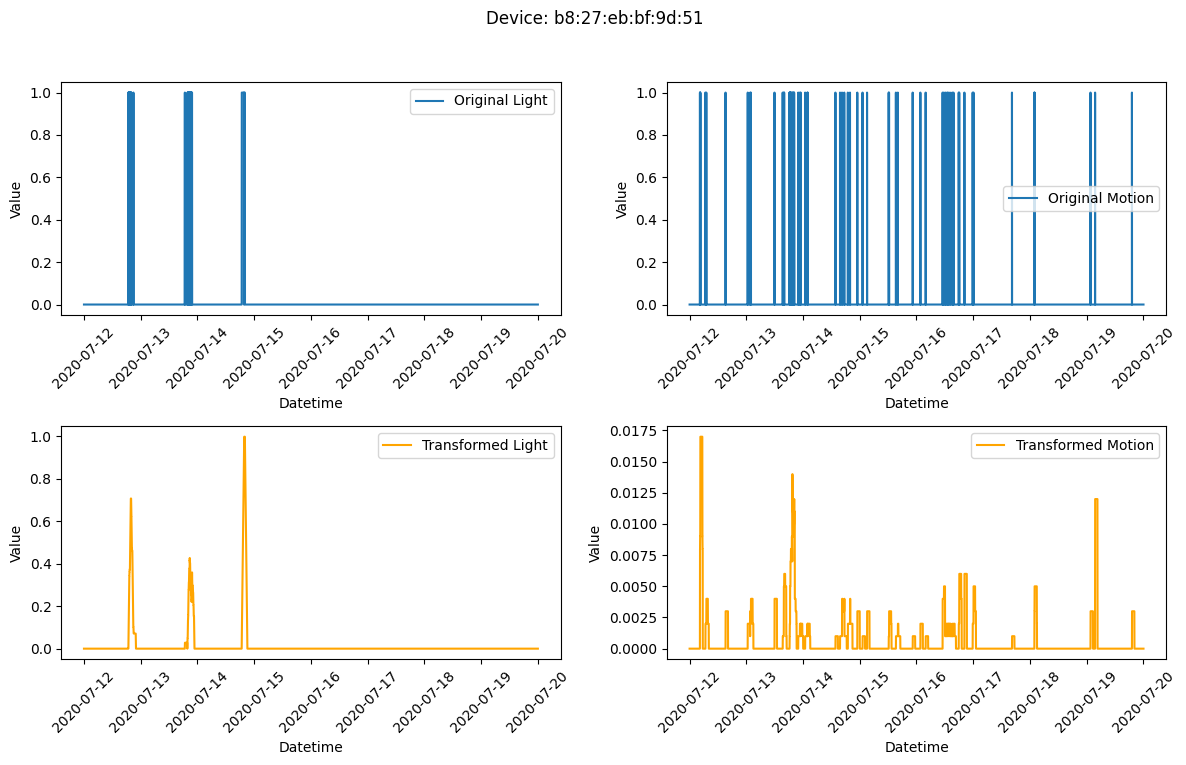

In [ ]:
def transform_binary_to_frequency(df, window_size):

    df_transformed = df.rolling(window=window_size, min_periods=1).mean()
    return df_transformed

def plot_transformed_data(device_df, window_size):

    for device_id, df in device_df.items():
        # Transform binary signals
        df_transformed = transform_binary_to_frequency(df[['light', 'motion']], window_size)

        # Plotting
        fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
        fig.suptitle(f"Device: {device_id}")

        # Original Data
        axes[0, 0].plot(df.index, df['light'], label='Original Light')
        axes[0, 1].plot(df.index, df['motion'], label='Original Motion')

        # Transformed Data
        axes[1, 0].plot(df_transformed.index, df_transformed['light'], label='Transformed Light', color='orange')
        axes[1, 1].plot(df_transformed.index, df_transformed['motion'], label='Transformed Motion', color='orange')

        # Setting labels
        for i in range(2):
            for j in range(2):
                axes[i, j].set_xlabel('Datetime')
                axes[i, j].set_ylabel('Value')
                axes[i, j].legend()
                axes[i, j].tick_params(axis='x', rotation=45)

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

window_size = 1000 # Adjustable until a sweet spot is found
plot_transformed_data(device_df, window_size)

# **Step Autocorrelation Used for Detecting Seasonality information**

The light and motion sensor data before and after applying a rolling average, transforming the data from binary to a continuous format. This transformed data is then reintegrated into the original grouped dataframe.

Next, we use the previously calculated sampling rates to generate autocorrelation plots so that we can observe the seasonal patterns within the dataset.

**Autocorrelation is a statistical measure that describes the degree to which a time series (a sequence of data points collected over time) is correlated with itself at different time lags. In other words, it measures the relationship between a variable's current value and its past values. Autocorrelation is commonly used in time series analysis to identify patterns, trends, and seasonality in data.**

/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/misc.py:457: RuntimeWarning: invalid value encountered in scalar divide
  return ((data[: n - h] - mean) * (data[h:] - mean)).sum() / n / c0


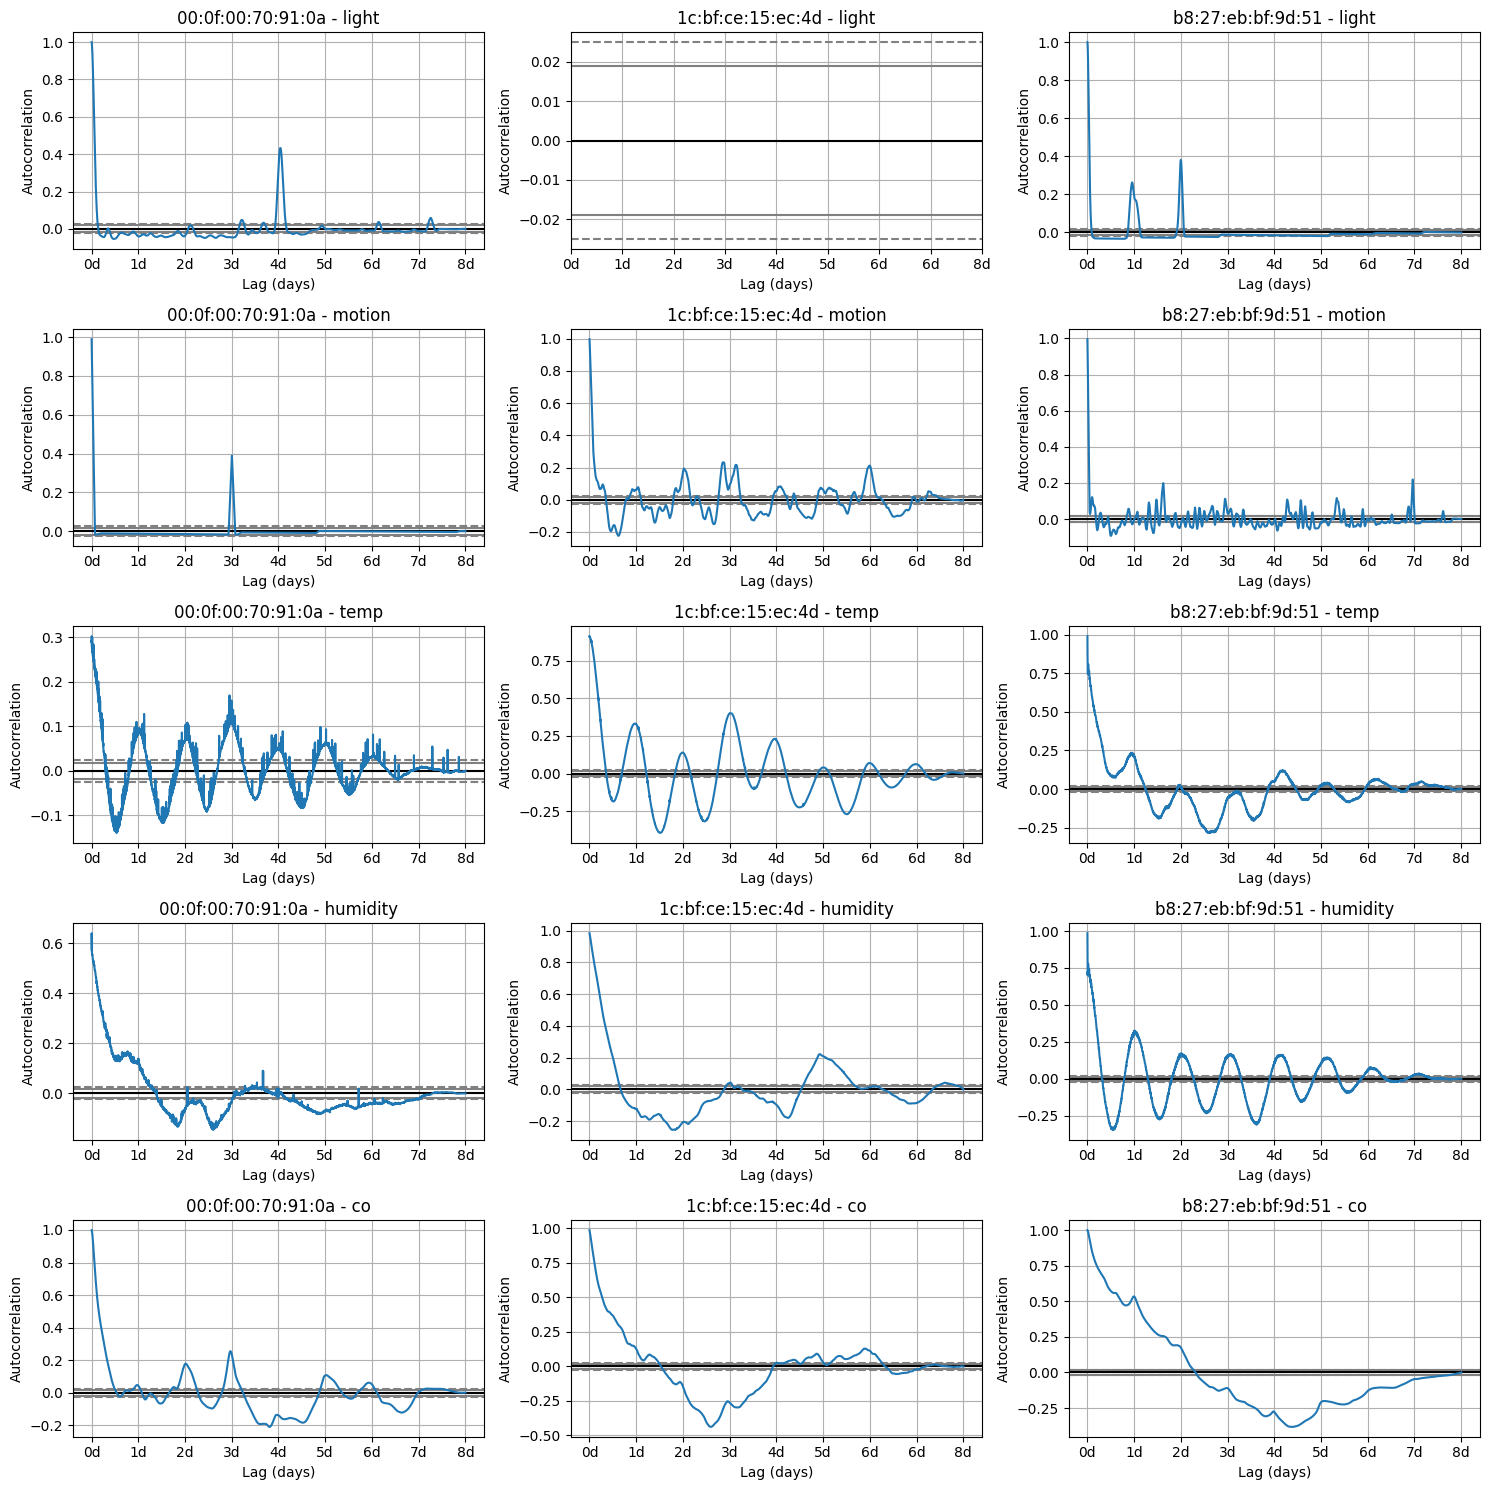

In [ ]:
def plot_autocorrelation(device_df, undersample_rate=1, sampling_rates=None):

    # Sensors in the desired order
    sensors = ['light', 'motion', 'temp', 'humidity', 'co']

    # Number of devices and sensors
    num_devices = len(device_df)
    num_sensors = len(sensors)

    # Seconds in a day
    seconds_in_day = 24 * 60 * 60

    # Create a figure with subplots
    fig, axes = plt.subplots(nrows=num_sensors, ncols=num_devices, figsize=(num_devices * 5, num_sensors * 3))

    # Iterate through each device and sensor
    for j, (device_id, df) in enumerate(device_df.items()):
        # Calculate number of samples in a day
        samples_per_day = seconds_in_day / (sampling_rates[device_id] * undersample_rate)

        # Undersample the data
        df_undersampled = df.iloc[::undersample_rate, :]

        for i, sensor in enumerate(sensors):
            # Create autocorrelation plot for each sensor
            autocorrelation_plot(df_undersampled[sensor], ax=axes[i][j])
            axes[i][j].set_title(f'{device_id} - {sensor}')
            axes[i][j].set_xlabel('Lag (days)')
            axes[i][j].set_ylabel('Autocorrelation')

            # Adjust x-axis to represent days
            max_lag = df_undersampled[sensor].shape[0]
            xticks = np.arange(0, max_lag, samples_per_day)
            xticklabels = [f"{int(lag/samples_per_day)}d" for lag in xticks]
            axes[i][j].set_xticks(xticks)
            axes[i][j].set_xticklabels(xticklabels)

    plt.tight_layout()
    plt.show()

# Apply the transformation to binary data
window_size = 1000
for device_id in device_df:
    device_df[device_id][['light', 'motion']] = transform_binary_to_frequency(device_df[device_id][['light', 'motion']], window_size)

# Sampling rates for each device
sampling_rates = {
    '00:0f:00:70:91:0a': 6.182787879460532,
    '1c:bf:ce:15:ec:4d': 6.526965254047981,
    'b8:27:eb:bf:9d:51': 3.6880388281568415
}

plot_autocorrelation(device_df, undersample_rate=10, sampling_rates=sampling_rates)

# **Output**
- All temperature sensors display daily seasonality, albeit with varying intensities.
- Device 1c-temperature stands out with the strongest seasonality, marked by high correlation factors and good signal-to-noise ratios. The pronounced seasonality in Device 1c coincides with daily human activity within its environment. Interestingly, this particular correlation pattern is not present in the other two devices.

- Regarding humidity, each environment demonstrates unique trends. In the Device 00 setting, there is an absence of noticeable daily seasonality. In contrast, Device 1c shows a vague bi-daily pattern, indicating more complex environmental dynamics. Device b8, on the other hand, experiences regular daily fluctuations in humidity.

#**Step Daily trends - Sensors information**.
**Convert time to hours for calculation and sample using moving average**
With the observation of a daily pattern, we analyze and compare the daily variations across all devices.

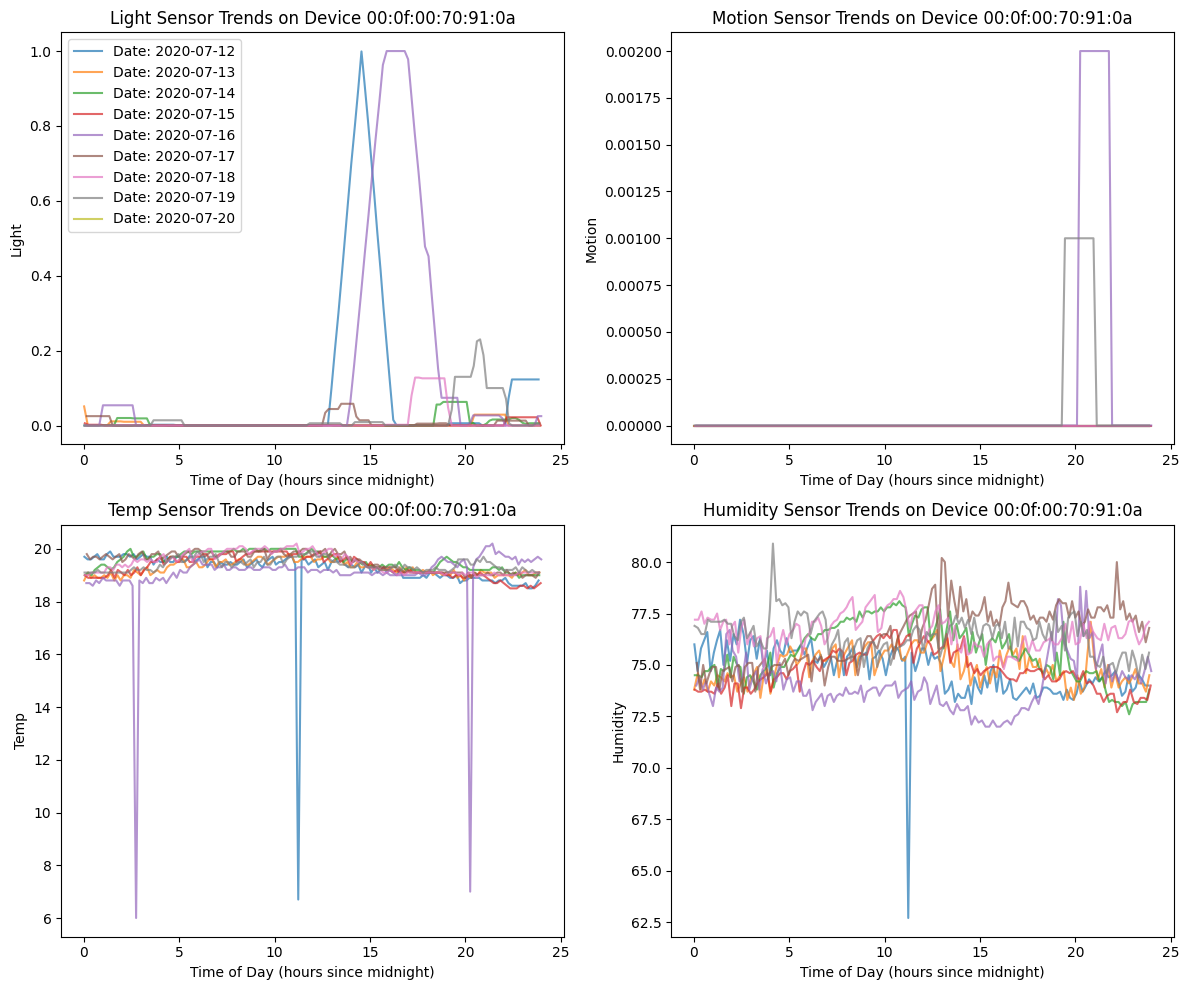

In [ ]:
def convert_time_to_hours(time_obj):

    return time_obj.hour + time_obj.minute / 60 + time_obj.second / 3600

def plot_daily_trends_for_sensors(device_df, device_id, sensors, undersample_rate=100, window_size=1):
    df = device_df[device_id]

    # Create a 2x2 subplot grid
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
    axes = axes.flatten()  # Flatten the axes array for easy indexing

    for i, sensor in enumerate(sensors):
        # Undersample and apply moving average
        df_resampled = df.iloc[::undersample_rate, :]
        df_smoothed = df_resampled[sensor].rolling(window=window_size, min_periods=1).mean()

        # Group by date and plot each day's data
        for date, group in df_smoothed.groupby(df_smoothed.index.date):
            # Convert index time to hours
            hours_since_midnight = [convert_time_to_hours(t) for t in group.index.time]
            axes[i].plot(hours_since_midnight, group, alpha=0.7, label=f'Date: {date}')

        axes[i].set_title(f'{sensor.capitalize()} Sensor Trends on Device {device_id}')
        axes[i].set_xlabel('Time of Day (hours since midnight)')
        axes[i].set_ylabel(f'{sensor.capitalize()}')
        if i == 0:
            axes[i].legend()

    # Adjust layout and show plot
    fig.tight_layout()
    plt.show()

sensors = ['light', 'motion', 'temp', 'humidity']
plot_daily_trends_for_sensors(device_df, '00:0f:00:70:91:0a', sensors)

## **Output from Device 00 analysis**
- Consistent with our previous observations, the temperature and humidity in the Device 00 environment appear to be well-controlled.
- Light and motion activities are rare and predominantly observed during afternoon and nighttime.

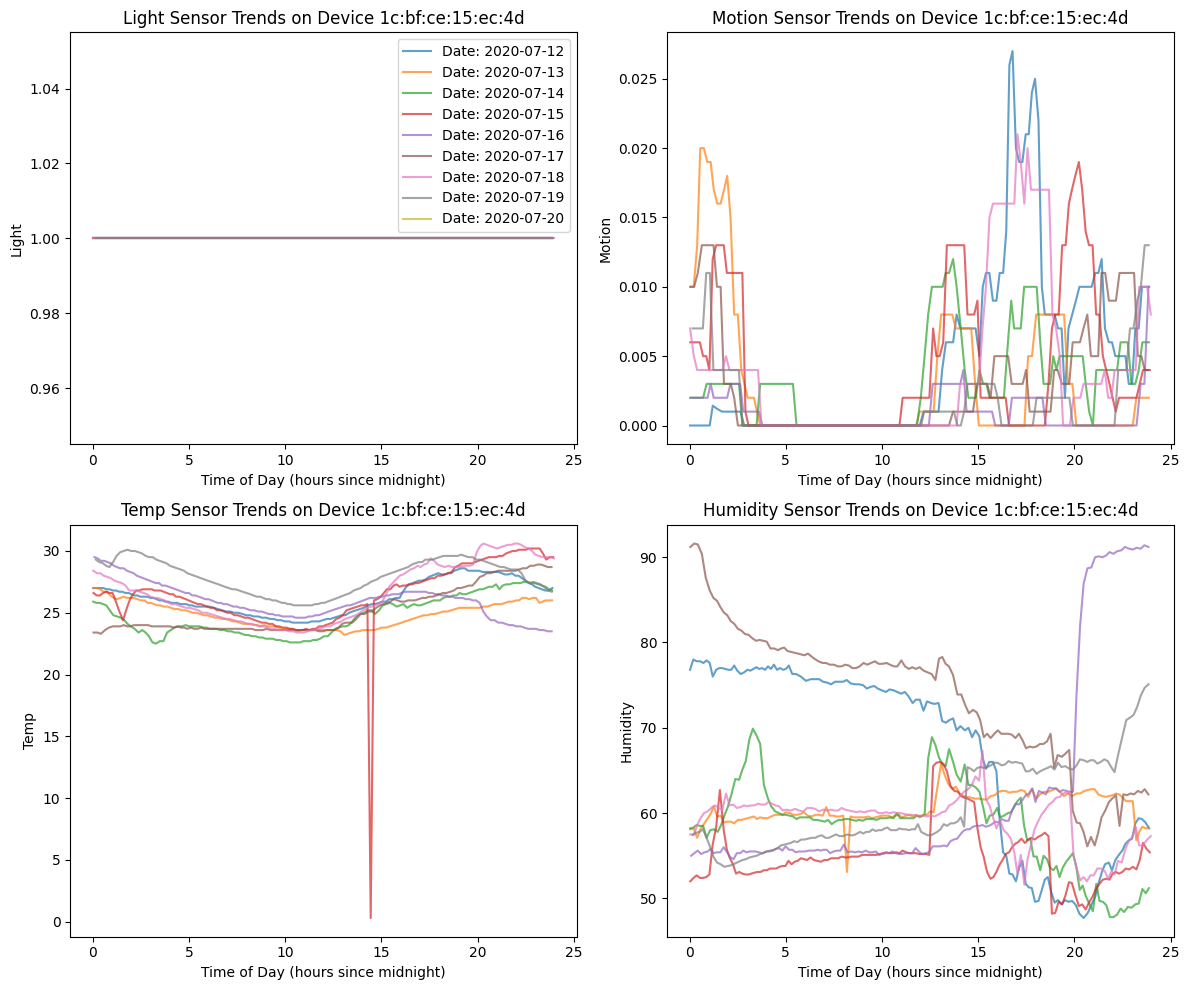

In [ ]:
plot_daily_trends_for_sensors(device_df, '1c:bf:ce:15:ec:4d', sensors)

## **Output of Device 1c analysis**
- Device 1c displays a distinct pattern compared to Device 00, with a noticeable daily fluctuations in temperature. This device records the coolest temperatures around noon, with an increase towards the night. This is a pattern opposite to natural temperature cycle. Moreover, human activity also concentrate on these periods. Therefore, such a pattern suggests a causal relationship between human activity and temperature dynamics within this environment, consistent with the seasonality observation.

- One can make assumption about this environment, say, a workshop in constant use. Another supporting evidence is the constant lighting condition.

- Additionally, the variability in humidity levels also suggests that the environment control here is less stringent, contrasting with the more stable environments observed in other devices. Based on these, we can imagine that the other two environments may be storage room with well-controlled environment and less frequent human activity.

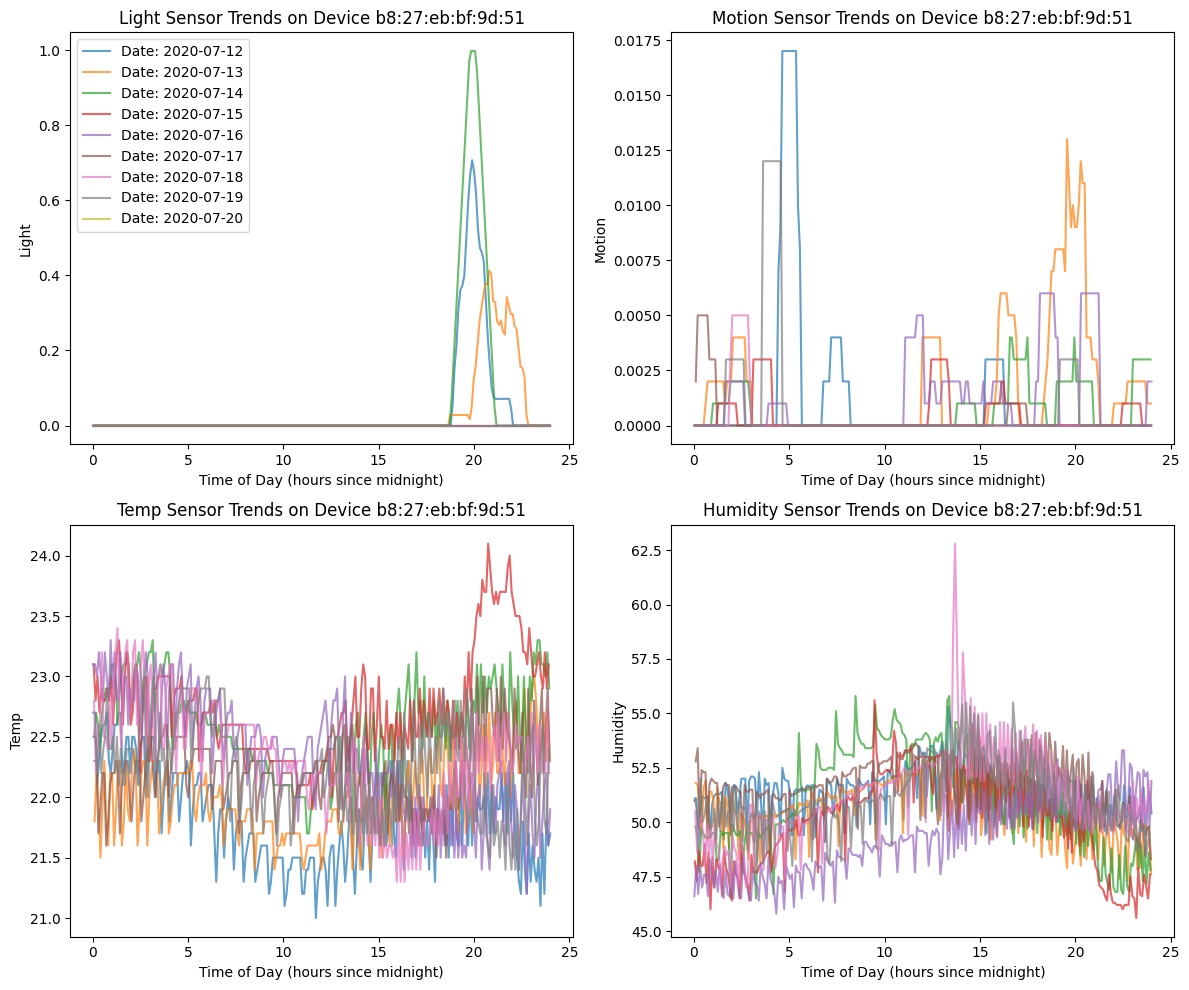

In [ ]:
plot_daily_trends_for_sensors(device_df, 'b8:27:eb:bf:9d:51', sensors)

## **Output of  Device b8 analysis**
- The light and motion sensor readings suggest that human activity tends to avoid the noon hours, instead concentrating during the afternoon and nighttime. The correlation between temperature and human activity is similar with the workshop area where Device 1c is located. However, the human activity is too random for any pattern to emerge in the autocorrelation plot.

- The environmental stability of Device b8 closely mirrors that of Device 00. A key distinction, however, lies in the high-frequency features in the data, in contrast to the high-intensity peaks observed in the other two devices. This difference is also presence in the humidity readings.

- The detailed sensor readout of Device b8, which is free of high-intensity noise and rich in periodic features, could be attributed to its sampling frequency being twice that of the other devices, enabling a finer resolution of data capture. Alternatively, the variation might also due to the devices being exposed to varying environmental influences, such as vibrations from human activities or mechanical operations. These factors could significantly affect the sensor outputs and need to be considered when interpreting the data.

# **Output Sensor IOT Results Intepretation**

This data analysis project successfully interprete IoT sensor data to infer the environmental conditions and their correlation with human activity.


**Environmental Control and Variation:** The analysis revealed distinct environmental profiles for each device, with Device 00 and Device b8 exhibiting well-controlled temperature and humidity conditions resembling those of storage rooms, whereas Device 1c showed more variation resembling that of a work area with less environmental control.

**Sensor Data Optimization:** Correlation analysis led to the removal of redundant sensors (LPG and smoke), demonstrating the potential for more efficient sensor deployment and data collection strategies.

**Advanced Data Processing Techniques:** Techniques such as transforming binary data into continuous measures and autocorrelation analysis were effectively employed, enabling seasonal analysis that suggests the strong correlation between temperature variation and human activity.


The demonstrates the power of data analytics in extracting meaningful insights from IoT sensor data, providing a comprehensive understanding of indoor environmental dynamics and human interaction within these spaces.

# **Transformer Analysis for temperature prediction, training, fit and predicting and plotting**

**1. Time Series Analysis (Temperature Prediction and Anomaly Detection):**

In [ ]:
!pip install pytorch-lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 61.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 57.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-

In [ ]:

import torch
import torch.nn as nn
import pytorch_lightning as pl
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import torch

import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from pytorch_lightning import LightningModule, Trainer
from pytorch_lightning.callbacks import EarlyStopping



from google.colab import drive
drive.mount('/content/drive')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
import os

#
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AAI-530/iot_telemetry_data.csv', engine='python')
print(data.head())
df = data


df = df.sort_values(by="ts")  # Ensure time ordering
df["ts"] = pd.to_datetime(df["ts"], unit='s')  # Convert timestamp

# Select relevant features for prediction
features = ["humidity", "co", "lpg", "smoke", "temp"]

# Normalize the data
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])

# Convert to numpy array
data = df[features].values

# Define dataset class for PyTorch Lightning
class TimeSeriesDataset(Dataset):
    def __init__(self, data, seq_length=10):
        self.data = data
        self.seq_length = seq_length

    def __len__(self):
        return len(self.data) - self.seq_length

    def __getitem__(self, idx):
        x = self.data[idx:idx + self.seq_length, :-1]  # Input features
        y = self.data[idx + self.seq_length, -1]  # Temperature target

        # Convert to PyTorch tensors and stack x
        x = torch.tensor(x, dtype=torch.float32)
        y = torch.tensor(y, dtype=torch.float32)

        return x, y

# Split dataset
seq_length = 10
train_size = int(0.8 * len(data))
train_dataset = TimeSeriesDataset(data[:train_size], seq_length)
test_dataset = TimeSeriesDataset(data[train_size:], seq_length)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define Transformer Model
class TimeSeriesDataset(Dataset):
    def __init__(self, data, seq_length=10):
        self.data = data
        self.seq_length = seq_length

    def __len__(self):
        return len(self.data) - self.seq_length

    def __getitem__(self, idx):
        x = self.data[idx:idx + self.seq_length, :-1]  # Input features
        y = self.data[idx + self.seq_length, -1]  # Temperature target

        # Convert to PyTorch tensors and stack x
        x = torch.tensor(x, dtype=torch.float32)
        y = torch.tensor(y, dtype=torch.float32)

        return x, y  # Return x as a single tensor, and y as a tensor

# Split dataset
seq_length = 10
train_size = int(0.8 * len(data))
train_dataset = TimeSeriesDataset(data[:train_size], seq_length)
test_dataset = TimeSeriesDataset(data[train_size:], seq_length)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define Transformer Model
class TransformerTimeSeries(pl.LightningModule):
    def __init__(self, input_dim, d_model=64, nhead=4, num_layers=2, lr=1e-3):
        super().__init__()
        self.lr = lr
        self.encoder = nn.Linear(input_dim, d_model)
        self.transformer = nn.Transformer(
            d_model=d_model, nhead=nhead, num_encoder_layers=num_layers, num_decoder_layers=num_layers
        )
        self.decoder = nn.Linear(d_model, 1)
        self.loss_fn = nn.MSELoss()

    def forward(self, src):


        src = src.view(src.size(0), src.size(1), -1).float()  # Reshape and convert to float

        src = self.encoder(src)
        output = self.transformer(src, src)
        return self.decoder(output[:, -1, :])  # Predict next time step


    def training_step(self, batch, batch_idx):
        x, y = batch
        y_pred = self(x).squeeze()
        loss = self.loss_fn(y_pred, y)
        self.log("train_loss", loss, prog_bar=True)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_pred = self(x).squeeze()
        loss = self.loss_fn(y_pred, y)
        self.log("val_loss", loss, prog_bar=True)

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=self.lr)

# Instantiate the model
model = TransformerTimeSeries(input_dim=len(features) - 1)


Mounted at /content/drive
             ts             device        co   humidity  light       lpg  \
0  1.594512e+09  b8:27:eb:bf:9d:51  0.004956  51.000000  False  0.007651   
1  1.594512e+09  00:0f:00:70:91:0a  0.002840  76.000000  False  0.005114   
2  1.594512e+09  b8:27:eb:bf:9d:51  0.004976  50.900000  False  0.007673   
3  1.594512e+09  1c:bf:ce:15:ec:4d  0.004403  76.800003   True  0.007023   
4  1.594512e+09  b8:27:eb:bf:9d:51  0.004967  50.900000  False  0.007664   

   motion     smoke       temp  
0   False  0.020411  22.700000  
1   False  0.013275  19.700001  
2   False  0.020475  22.600000  
3   False  0.018628  27.000000  
4   False  0.020448  22.600000  


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import pytorch_lightning as pl
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import os

# Install necessary libraries
!pip install pytorch-lightning

# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AAI-530/iot_telemetry_data.csv', engine='python')

# Preprocess the data
df = data.copy()
df = df.sort_values(by="ts")
df["ts"] = pd.to_datetime(df["ts"], unit='s')
features = ["humidity", "co", "lpg", "smoke", "temp"]
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])
data = df[features].values

# Define the dataset
class TimeSeriesDataset(Dataset):
    def __init__(self, data, seq_length=10):
        self.data = data
        self.seq_length = seq_length

    def __len__(self):
        return len(self.data) - self.seq_length

    def __getitem__(self, idx):
        x = self.data[idx:idx + self.seq_length, :-1]  # Input features only
        y = self.data[idx + self.seq_length, -1]  # Target (temperature)
        return torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

# Split the data
seq_length = 10
train_size = int(0.8 * len(data))
train_dataset = TimeSeriesDataset(data[:train_size], seq_length)
test_dataset = TimeSeriesDataset(data[train_size:], seq_length)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define the model
class TransformerTimeSeries(pl.LightningModule):
    def __init__(self, input_dim, d_model=64, nhead=4, num_layers=2, lr=1e-3):
        super().__init__()
        self.save_hyperparameters()  # Save hyperparameters for easier loading
        self.encoder = nn.Linear(input_dim, d_model)
        self.transformer = nn.Transformer(d_model=d_model, nhead=nhead,
                                           num_encoder_layers=num_layers,
                                           num_decoder_layers=num_layers)
        self.decoder = nn.Linear(d_model, 1)
        self.loss_fn = nn.MSELoss()

    def forward(self, x):
        # Reshape and ensure float type within forward
        x = x.view(x.size(0), x.size(1), -1).float()
        x = self.encoder(x)
        output = self.transformer(x, x)  # Pass x as both encoder and decoder input
        return self.decoder(output[:, -1, :])  # Predict next time step

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_pred = self(x).squeeze()
        loss = self.loss_fn(y_pred, y)
        self.log("train_loss", loss, prog_bar=True)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_pred = self(x).squeeze()
        loss = self.loss_fn(y_pred, y)
        self.log("val_loss", loss, prog_bar=True)

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=self.hparams.lr)

    def predict_step(self, batch, batch_idx, dataloader_idx=0):
        x, _ = batch  # Extract input features, ignore target
        return self(x)  # Directly call forward with input features

# Train the model
model = TransformerTimeSeries(input_dim=len(features) - 1)
trainer = pl.Trainer(max_epochs=1, accelerator="gpu" if torch.cuda.is_available() else "cpu",
                     devices=1 if torch.cuda.is_available() else 0)
trainer.fit(model, train_loader)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.11/dist-packages/pytorch_lightning/trainer/configuration_validator.py:70: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name        | Type        | Params | Mode 
----------------------------------------------------
0 | encoder     | Linear      | 320    | train
1 | transformer | T

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

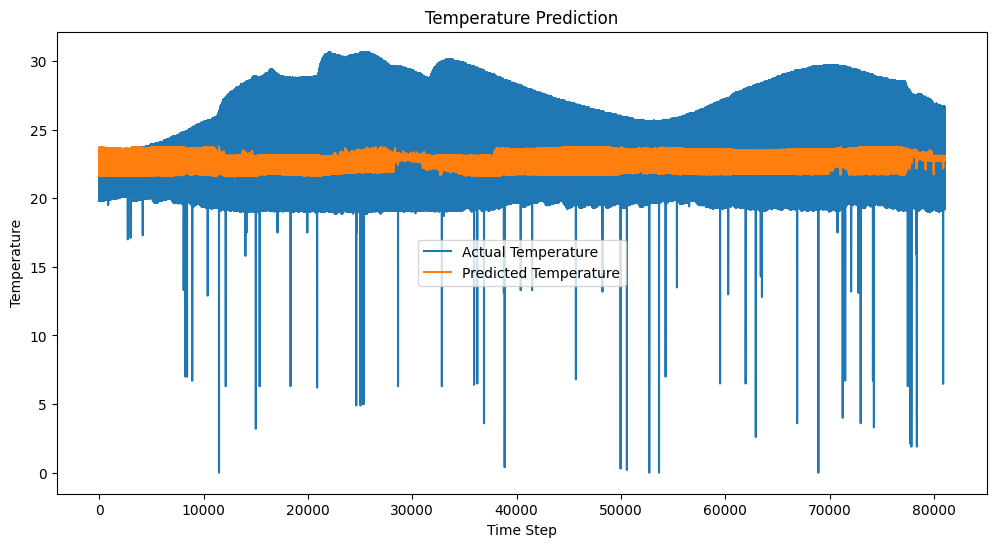

In [ ]:
predictions = trainer.predict(model, test_loader)
predictions = torch.cat(predictions).cpu().numpy()  # Concatenate and move to CPU

# Create a new scaler for the target variable (temperature) only
temp_scaler = MinMaxScaler()
temp_scaler.min_, temp_scaler.scale_ = scaler.min_[-1], scaler.scale_[-1] # Extract min and scale for temperature

# Inverse transform to get actual temperature values
predicted_temps = temp_scaler.inverse_transform(predictions.reshape(-1, 1))  # Use temp_scaler here
predicted_temps = predicted_temps.flatten() # Flatten to 1D

# Get actual temperatures using temp_scaler
actual_temps = temp_scaler.inverse_transform(data[train_size + seq_length:][:, -1].reshape(-1, 1))
actual_temps = actual_temps.flatten() # Flatten to 1D

plt.figure(figsize=(12, 6))
plt.plot(actual_temps, label='Actual Temperature')
plt.plot(predicted_temps, label='Predicted Temperature')
plt.xlabel('Time Step')
plt.ylabel('Temperature')
plt.title('Temperature Prediction')
plt.legend()
plt.show()

#**prediction of first 200 datapoints with transformer model**



[23.02618  23.67337  23.019495 23.019495 23.680546 21.647133 23.020912
 23.016636 23.028347 23.65195  23.023289 21.641872 23.02216  21.63799
 23.680546 23.022314 23.661905 23.016926 21.639454 23.023155 21.638449
 23.023014 23.675638 23.01822  23.018644 23.661905 23.024147 21.646862
 23.02499  21.638578 23.64464  23.016897 23.015213 23.6801   21.678415
 23.021376 21.677847 23.6801   23.015213 21.680706 23.024576 23.688688
 21.677847 23.015654 21.680706 23.658907 23.013336 21.678108 23.0212
 23.021654 21.677979 23.66677  23.01826  21.677979 23.020494 21.677979
 23.01885  23.636597 23.027903 23.677408 21.6839   23.020325 21.677979
 23.016764 23.654821 23.029325 23.034904 23.512604 21.653843 23.028448
 23.027733 21.66374  23.028805 23.644669 23.028795 23.027784 21.665636
 23.660997 23.035519 21.656979 23.026197 23.654821 23.030941 23.668678
 23.028255 21.66374  23.025942 21.66374  23.021843 21.653843 23.614353
 23.020866 23.025476 23.668678 21.663836 23.022234 23.017302 23.684635
 23.01730

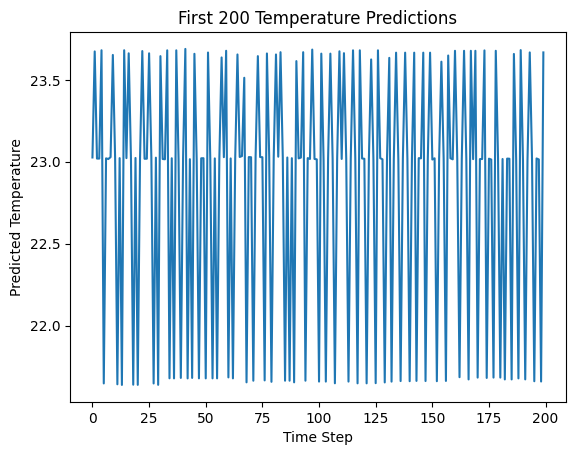

In [ ]:
first_200_predictions = predicted_temps[:200]
# Print the predictions
print(first_200_predictions)

#
plt.plot(first_200_predictions)
plt.xlabel('Time Step')
plt.ylabel('Predicted Temperature')
plt.title('First 200 Temperature Predictions')
plt.show()

#**Detect Anomaly in temp prediction**
# **Anomalies are detected by computing the average and standard deviation of the sensor data**

Anomaly indices: [    4    13    29    33    36    41    93   100   117   125   142   146
   166   188   198   202   224   232   241   245   250   257   263   267
   273   281   285   288   292   296   299   307   316   319   327   341
   359   372   386   392   393   398   408   421   429   432   436   439
   480   499   530   537   548   556   564   570   586   595   662   736
   743   747   756   759   774  1356  3108  3127  3132  3141  3153  3177
  3182  3188  3206  3210  3215  3222  3228  3231  3235  3240  3247  3258
  3270  3274  3294  3372  3428  3436  3519  3574  3590  3613  3624  3635
  3684  3691  3705  3709  3729  3733  3745  3750  3756  3899  3909  3921
  3944  3970  3973  3976  3993  3999  4041  4069  4118  4126  4135  4142
  4145  4150  4155  4163  4168  4172  4177  4184  4187  4213  4362  4383
  4420  4423  4429  4481  4497  4509  4557  4602  4605  4613  4680  4816
  4827  4930  4934  4938  4941  4951  4982  4985  5000  5007  5011  5019
  5031  5036  5044  5049  5053  50

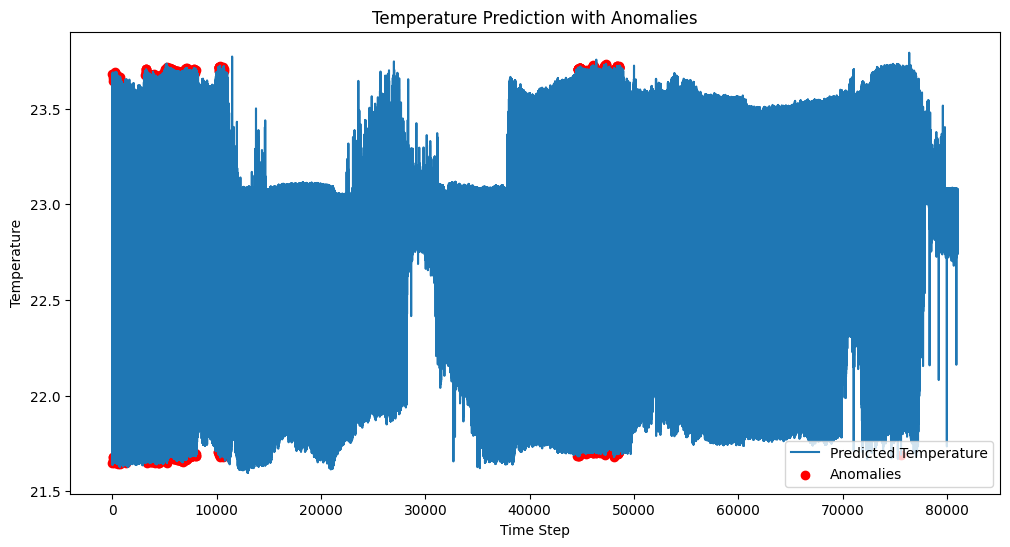

In [ ]:
import numpy as np

threshold = 2  # Example threshold. Adjust this value based on your data.

# Calculate the absolute difference between consecutive predictions
differences = np.abs(np.diff(predicted_temps))

# Find indices where the difference exceeds the threshold
anomaly_indices = np.where(differences > threshold)[0]

# Print the indices of the anomalies
print("Anomaly indices:", anomaly_indices)

# You can also print the actual values that are considered anomalies:
print("Anomalous temperature values:", predicted_temps[anomaly_indices + 1]) # +1 because diff is one step behind

# Plot the data with anomalies highlighted
plt.figure(figsize=(12, 6))
plt.plot(predicted_temps, label='Predicted Temperature')
plt.scatter(anomaly_indices + 1, predicted_temps[anomaly_indices + 1], color='red', label='Anomalies')
plt.xlabel('Time Step')
plt.ylabel('Temperature')
plt.title('Temperature Prediction with Anomalies')
plt.legend()
plt.show()

# **Detect CyberAttack  Analysis - Linear Regression is used for training and predicting the attack, pie plot for attack details and box plots to know the statistical information**

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from keras.models import Sequential
from keras.layers import Dense
import keras.activations,keras.optimizers,keras.losses

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
import seaborn as sn

from google.colab import drive
drive.mount('/content/drive')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
import os

#
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AAI-530/BotNeTIoT-L01_label_NoDuplicates.csv', engine='python')
print(data.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Unnamed: 0  MI_dir_L0.1_weight  MI_dir_L0.1_mean  MI_dir_L0.1_variance  \
0           0            1.000000         98.000000          0.000000e+00   
1           1            1.931640         98.000000          1.818989e-12   
2           2            2.904273         86.981750          2.311822e+02   
3           3            3.902546         83.655268          2.040614e+02   
4           4            4.902545         81.685828          1.775746e+02   

   H_L0.1_weight  H_L0.1_mean  H_L0.1_variance  HH_L0.1_weight  HH_L0.1_mean  \
0       1.000000    98.000000     0.000000e+00         1.00000          98.0   
1       1.931640    98.000000     1.818989e-12         1.93164          98.0   
2       2.904273    86.981750     2.311822e+02         1.00000          66.0   
3       3.902546    83.655268     2.040614e+02         1.00000          74.0   
4       

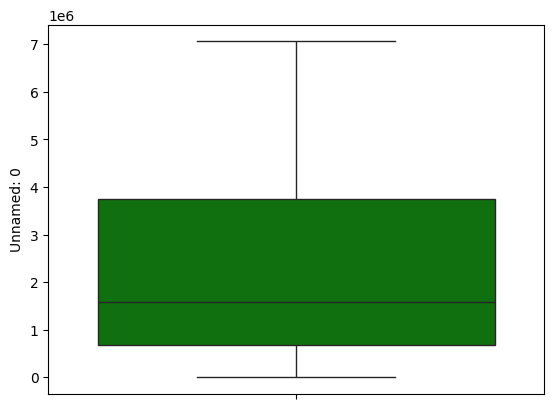

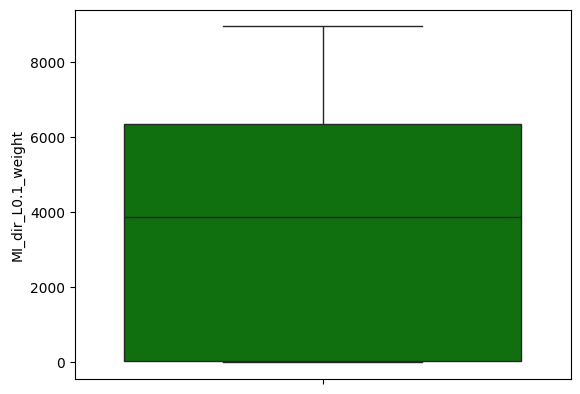

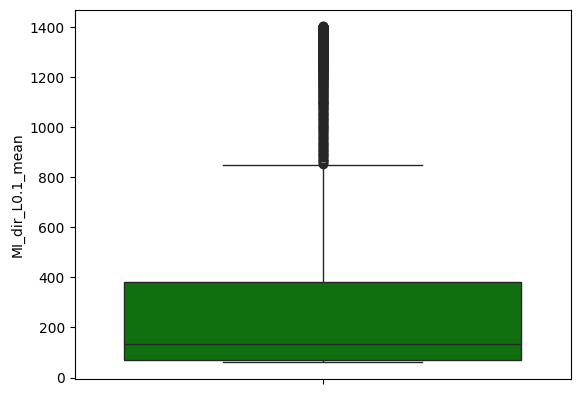

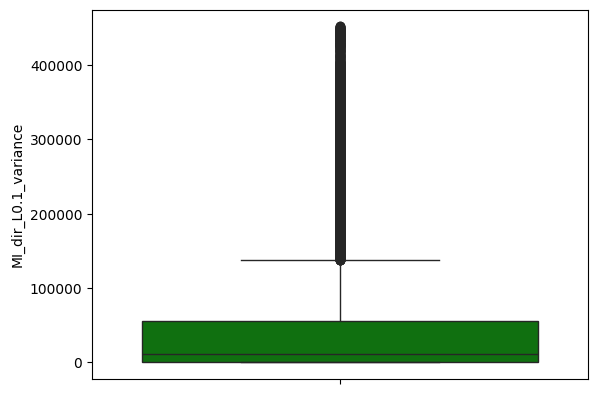

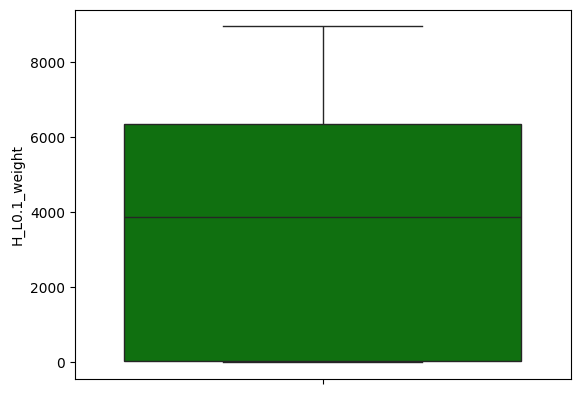

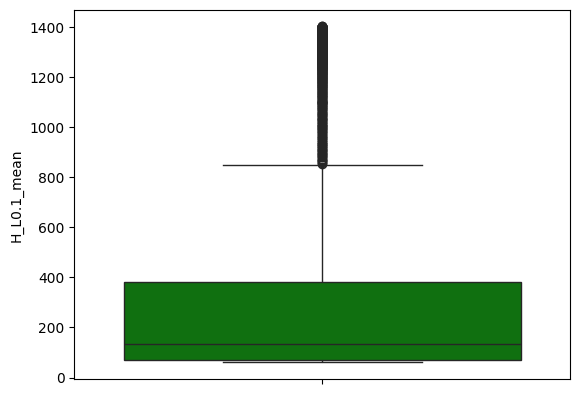

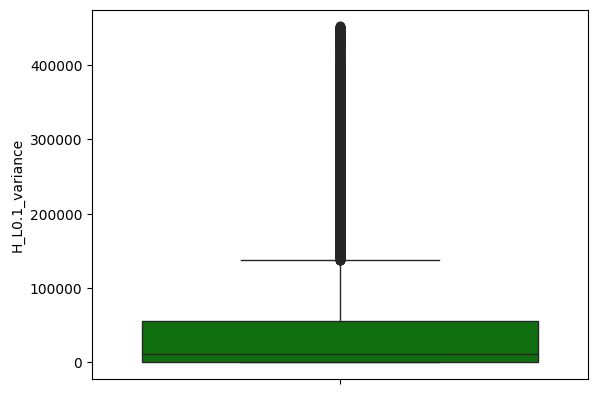

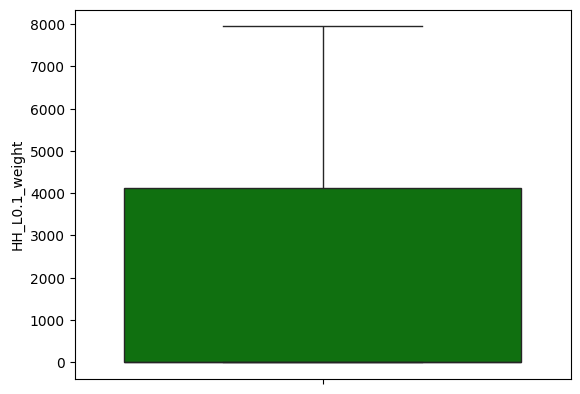

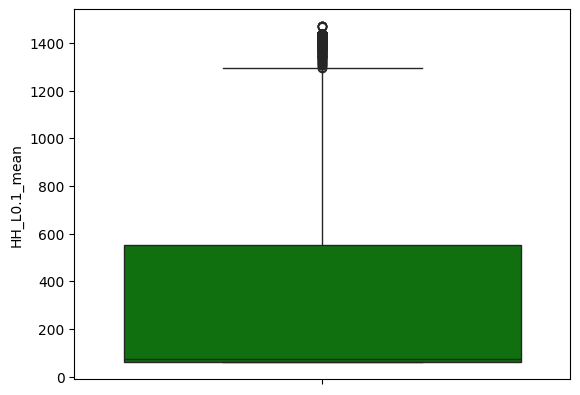

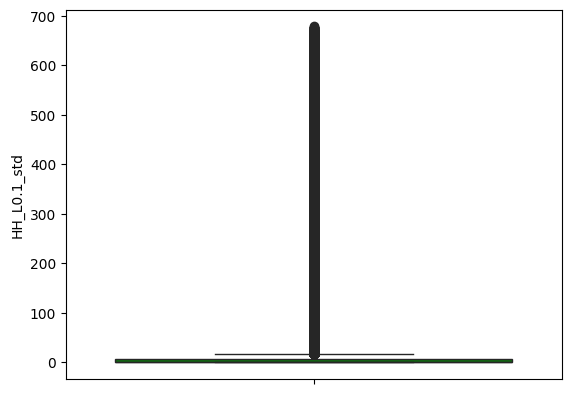

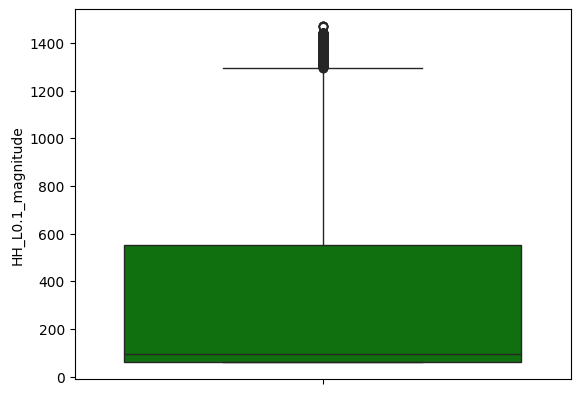

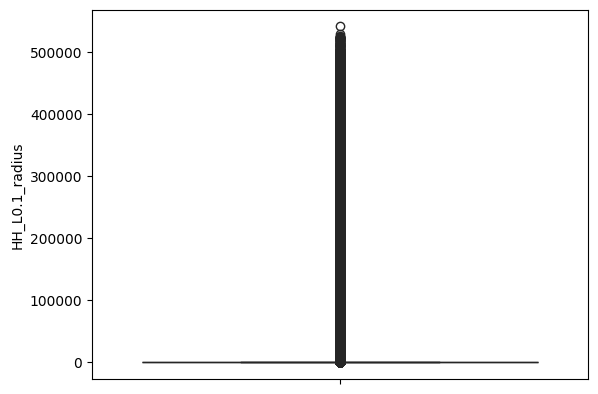

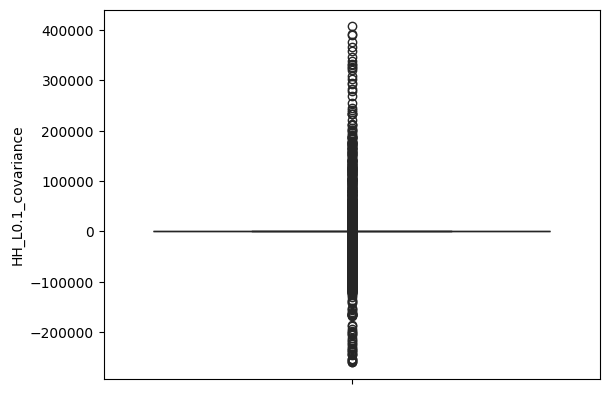

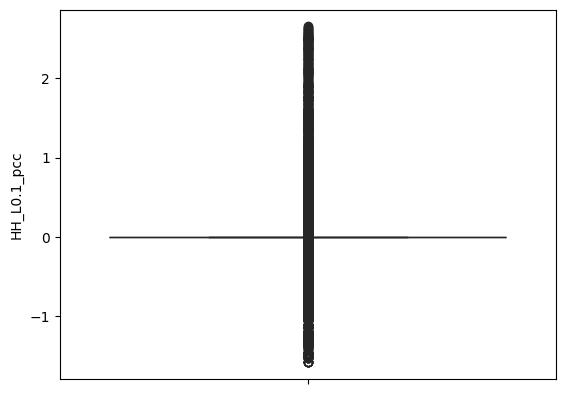

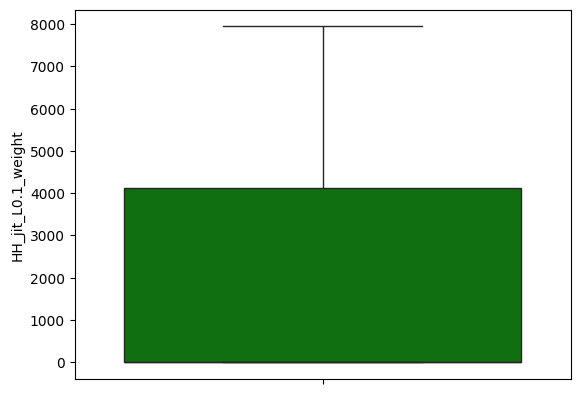

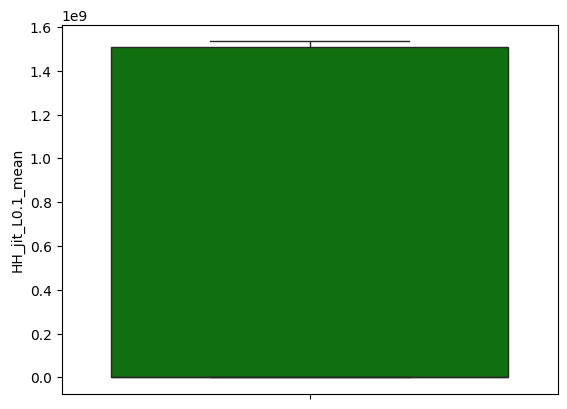

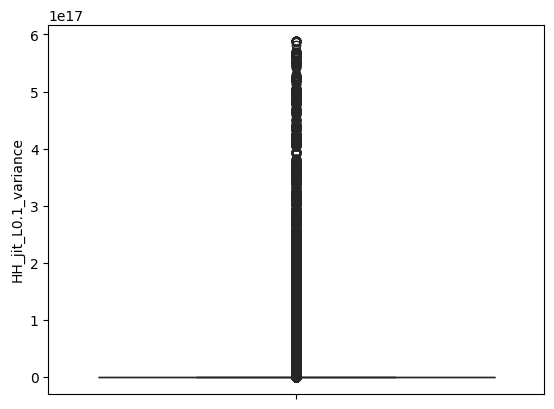

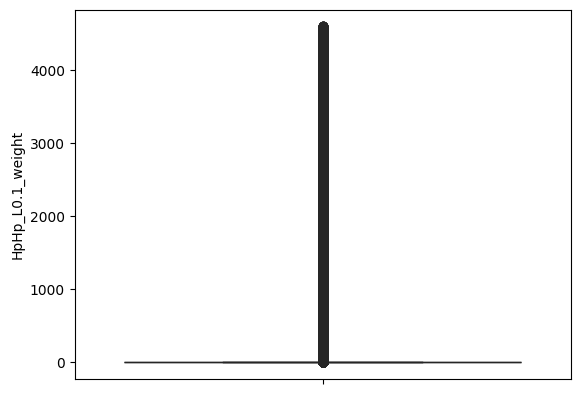

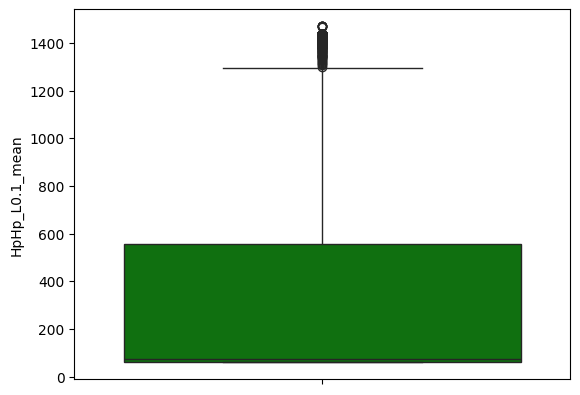

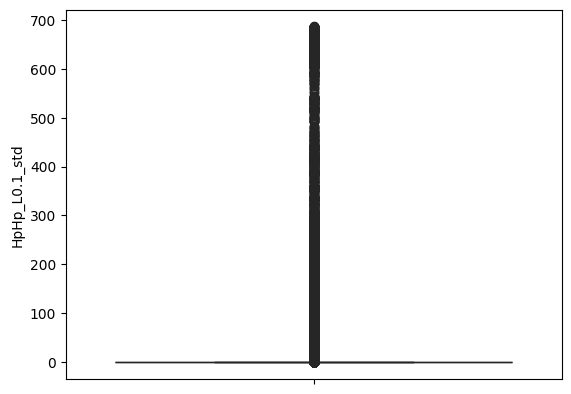

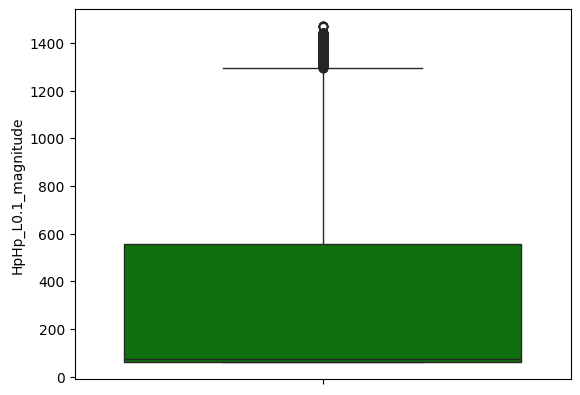

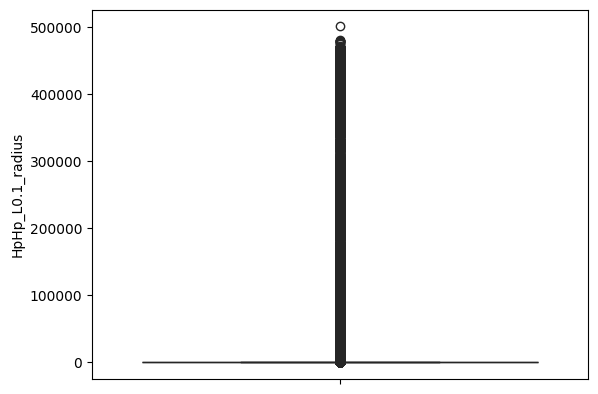

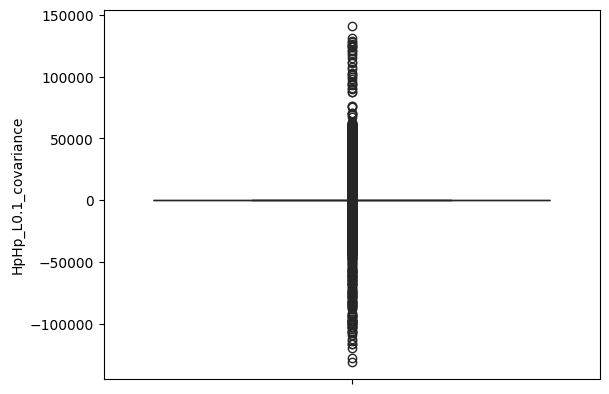

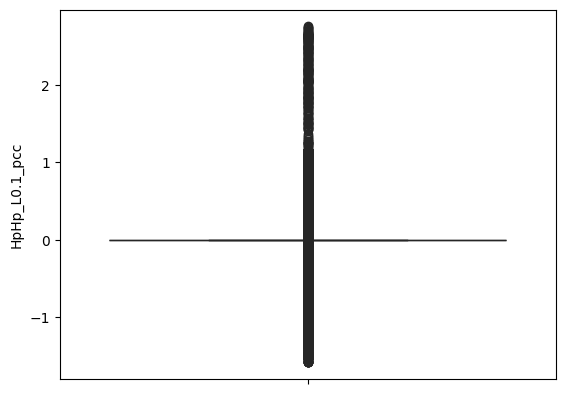

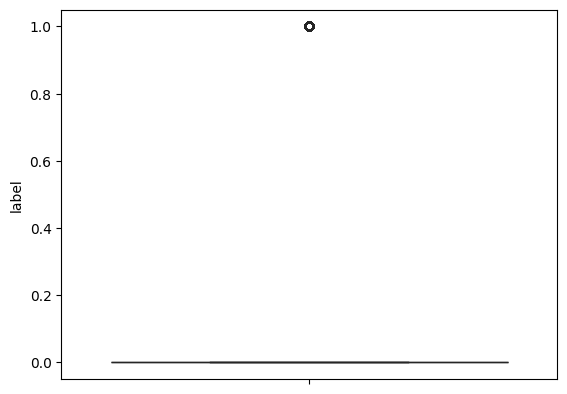

In [ ]:
import seaborn as sn
for i in data.select_dtypes(include='number').columns.values:
    sn.boxplot(data[i],color='green')
    plt.show()

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from keras.models import Sequential
from keras.layers import Dense
import keras.activations,keras.optimizers,keras.losses
from google.colab import drive
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.plotting import autocorrelation_plot
import os


drive.mount('/content/drive')



data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AAI-530/BoTNeTIoT-L01-v2.csv', engine='python', chunksize=100)
chunk=data.get_chunk(10)
print(chunk)
chunk = chunk.dropna()

print(chunk)
data=chunk



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   MI_dir_L0.1_weight  MI_dir_L0.1_mean  MI_dir_L0.1_variance  H_L0.1_weight  \
0            1.000000         98.000000          0.000000e+00       1.000000   
1            1.931640         98.000000          1.818989e-12       1.931640   
2            2.904273         86.981750          2.311822e+02       2.904273   
3            3.902546         83.655268          2.040614e+02       3.902546   
4            4.902545         81.685828          1.775746e+02       4.902545   
5            5.902539         80.383706          1.558026e+02       5.902539   
6          613.818538         74.095096          2.659110e+00     613.818538   
7          614.778927         74.094941          2.654800e+00     614.778927   
8          615.618170         74.094787          2.650502e+00     615.618170   
9          616.596022         74.094633          2.646218e+00     616.5

In [ ]:
import pandas as pd

print(data['Attack'].unique())


['gafgyt']


In [ ]:
chunk['Attack']

,Attack
0,gafgyt
1,gafgyt
2,gafgyt
3,gafgyt
4,gafgyt
5,gafgyt
6,gafgyt
7,gafgyt
8,gafgyt
9,gafgyt


In [ ]:
import pandas as pd


mirai_df = pd.DataFrame()
graft_df = pd.DataFrame()

for chunk in pd.read_csv('/content/drive/My Drive/Colab Notebooks/AAI-530/BoTNeTIoT-L01-v2.csv', engine='python', chunksize=100):
    mirai_chunk = chunk[chunk['Attack'] == 'mirai']
    graft_chunk = chunk[chunk['Attack'] == 'gafgyt']

    mirai_df = pd.concat([mirai_df, mirai_chunk])
    graft_df = pd.concat([graft_df, graft_chunk])

    if len(mirai_df) >= 2000 and len(graft_df) >= 2000:
        break

mirai_df = mirai_df.head(2000)
graft_df = graft_df.head(2000)

# Combine the dataframes if needed
combined_df = pd.concat([mirai_df, graft_df])

combined_df


,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,HH_L0.1_weight,HH_L0.1_mean,HH_L0.1_std,HH_L0.1_magnitude,...,HpHp_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_magnitude,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,Device_Name,Attack,Attack_subType,label
316650,1.000000,566.000000,0.000000e+00,1.000000,566.000000,0.000000e+00,1.000000,566.0,0.000000,566.000000,...,566.0,0.0,566.0,0.0,0.0,0.0,Danmini_Doorbell,mirai,ack,0
316651,1.999932,566.000000,1.746230e-10,1.999932,566.000000,1.746230e-10,1.999932,566.0,0.000013,566.000000,...,566.0,0.0,566.0,0.0,0.0,0.0,Danmini_Doorbell,mirai,ack,0
316652,2.999171,566.000000,0.000000e+00,2.999171,566.000000,0.000000e+00,2.999171,566.0,0.000000,566.000000,...,566.0,0.0,566.0,0.0,0.0,0.0,Danmini_Doorbell,mirai,ack,0
316653,3.999171,566.000000,0.000000e+00,3.999171,566.000000,0.000000e+00,3.999171,566.0,0.000000,566.000000,...,566.0,0.0,566.0,0.0,0.0,0.0,Danmini_Doorbell,mirai,ack,0
316654,4.998261,566.000000,0.000000e+00,4.998261,566.000000,0.000000e+00,4.998261,566.0,0.000000,566.000000,...,566.0,0.0,566.0,0.0,0.0,0.0,Danmini_Doorbell,mirai,ack,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2227.972510,74.048593,1.246264e+00,2227.972510,74.048593,1.246264e+00,2222.505416,74.0,0.000006,95.268043,...,74.0,0.0,74.0,0.0,0.0,0.0,Danmini_Doorbell,gafgyt,combo,0
1996,2228.971884,74.048571,1.245706e+00,2228.971884,74.048571,1.245706e+00,2223.504792,74.0,0.000006,95.268043,...,74.0,0.0,74.0,0.0,0.0,0.0,Danmini_Doorbell,gafgyt,combo,0
1997,2229.796221,74.048549,1.245148e+00,2229.796221,74.048549,1.245148e+00,2224.329560,74.0,0.000006,95.268043,...,74.0,0.0,74.0,0.0,0.0,0.0,Danmini_Doorbell,gafgyt,combo,0
1998,2230.795742,74.048528,1.244591e+00,2230.795742,74.048528,1.244591e+00,2225.329082,74.0,0.000006,95.268043,...,74.0,0.0,74.0,0.0,0.0,0.0,Danmini_Doorbell,gafgyt,combo,0


# **Linear Regression for predicting the attack**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
#Import LabelEncoder here as well to make it available within the else block.
from sklearn.preprocessing import LabelEncoder
from google.colab import drive
drive.mount('/content/drive')


file_path = '/content/drive/My Drive/Colab Notebooks/AAI-530/BoTNeTIoT-L01-v2.csv'

#
total_rows = sum(1 for _ in open(file_path))
half_point = total_rows // 2
df = pd.read_csv(file_path, skiprows=half_point, engine='python')

# Handle potential errors during file reading.
try:
    df = pd.read_csv(file_path, skiprows=range(1,half_point+1), engine='python')
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Check the file format and try again.")
except FileNotFoundError:
    print(f"Error: File '{file_path}' not found.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")
else:
    #Preprocess the data
    df = df.dropna() # Remove rows with missing values


    # save the Attack rolumn
    df['Attack_name']=df['Attack']
    le = LabelEncoder()

    df['Attack'] = le.fit_transform(df['Attack'])

    # Prepare data for linear regression
    X = df.drop('Attack', axis=1)
    y = df['Attack']

    #Convert non-numeric columns to numeric representation.
    for col in X.columns:
        if X[col].dtype == 'object':
            X[col] = le.fit_transform(X[col])

    X = X.select_dtypes(include=np.number) #Only include numeric columns
    y = y.astype(int) #Convert to integers

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Mean Squared Error: 0.5236330182518893


In [ ]:

print(df['Attack_name'].unique())


['mirai' 'gafgyt' 'Normal']


In [ ]:
print(df['Attack'])
df['Attack'].value_counts()

0          2
1          2
2          2
3          2
4          2
          ..
3531298    0
3531299    0
3531300    0
3531301    0
3531302    0
Name: Attack, Length: 3531303, dtype: int64


,count
Attack,
2,1723598
1,1251773
0,555932


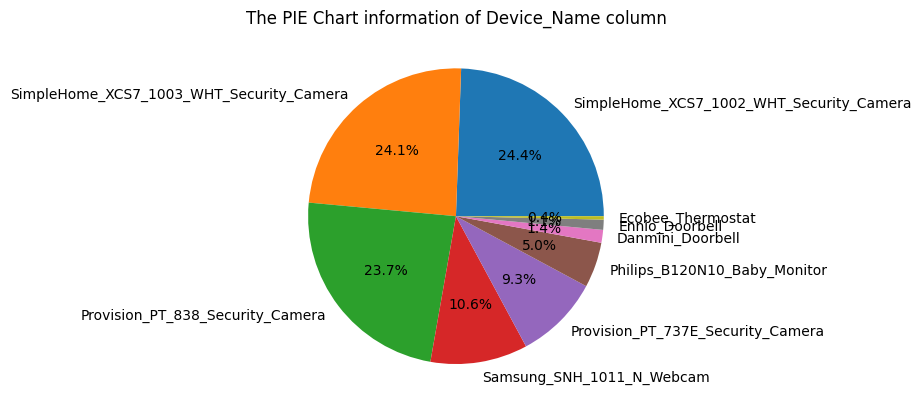

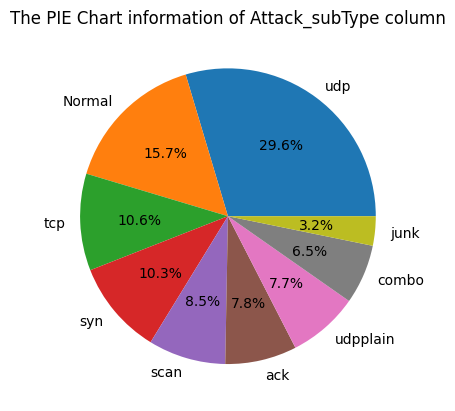

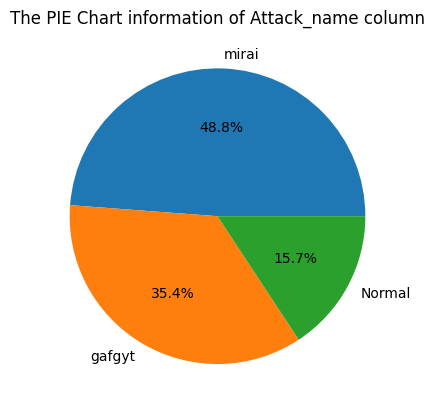

In [ ]:
import matplotlib.pyplot as plt

data = df
for i in data.select_dtypes(include='object').columns.values:
    if len(data[i].value_counts()) <=10:
        val=data[i].value_counts().values
        index=data[i].value_counts().index
        plt.pie(val,labels=index,autopct='%1.1f%%')
        plt.title(f'The PIE Chart information of {i} column')
        plt.show()

In [ ]:
for i in data.select_dtypes(include='object').columns.values:
    print(data[i].value_counts())
    print("--------------------------------")


Device_Name
SimpleHome_XCS7_1002_WHT_Security_Camera    863056
SimpleHome_XCS7_1003_WHT_Security_Camera    850826
Provision_PT_838_Security_Camera            836891
Samsung_SNH_1011_N_Webcam                   375222
Provision_PT_737E_Security_Camera           328307
Philips_B120N10_Baby_Monitor                175240
Danmini_Doorbell                             49548
Ennio_Doorbell                               39100
Ecobee_Thermostat                            13113
Name: count, dtype: int64
--------------------------------
Attack_subType
udp         1045794
Normal       555932
tcp          374061
syn          363269
scan         299192
ack          276664
udpplain     273146
combo        229880
junk         113365
Name: count, dtype: int64
--------------------------------
Attack_name
mirai     1723598
gafgyt    1251773
Normal     555932
Name: count, dtype: int64
--------------------------------


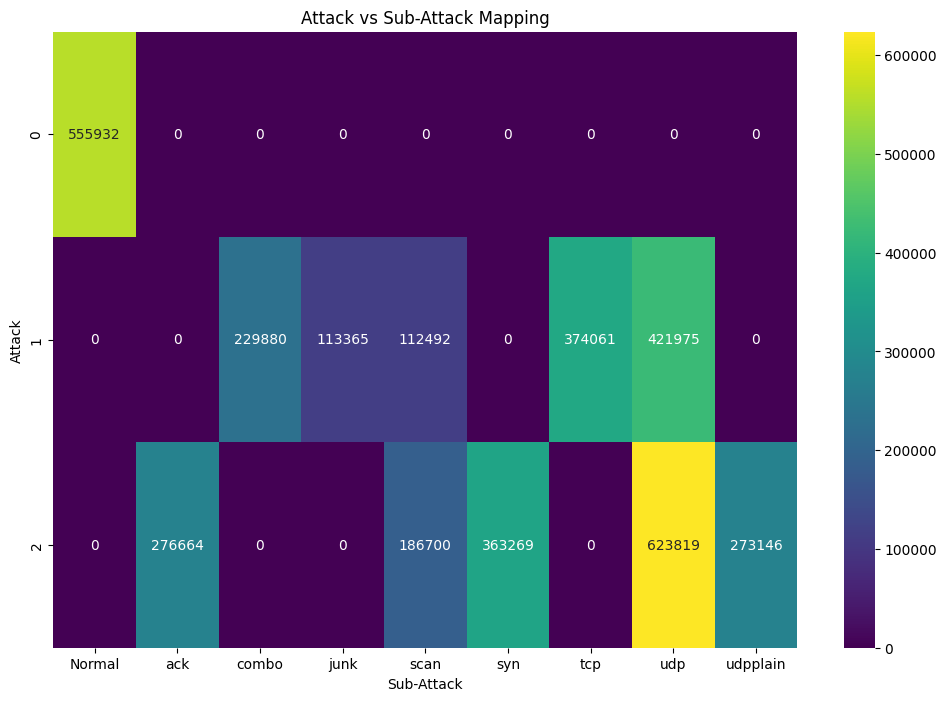

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns


attack_subattack_counts = pd.crosstab(df['Attack'], df['Attack_subType'])

# Plot the heatmap
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
sns.heatmap(attack_subattack_counts, annot=True, fmt="d", cmap="viridis")
plt.title("Attack vs Sub-Attack Mapping")
plt.xlabel("Sub-Attack")
plt.ylabel("Attack")
plt.show()

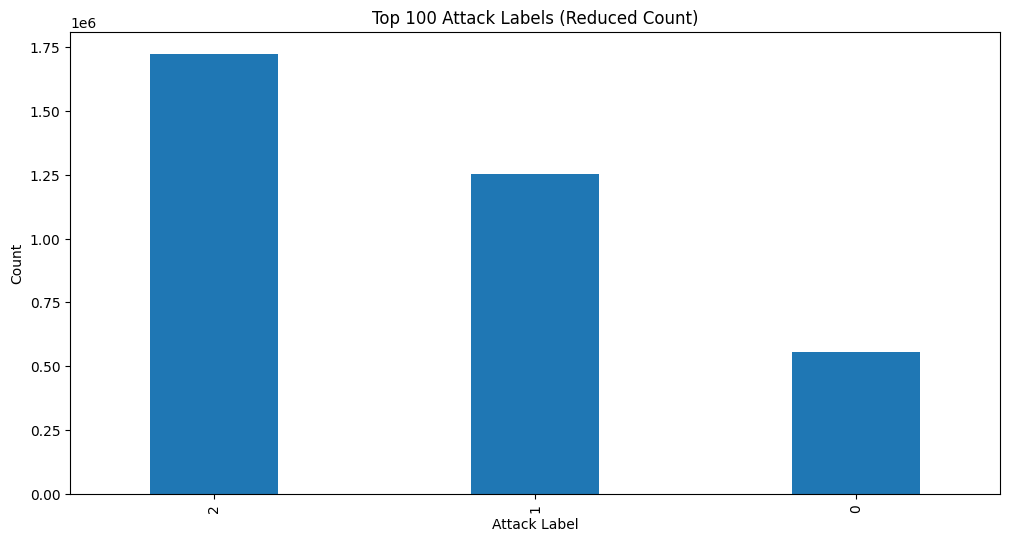

In [ ]:

attack_counts = df['Attack'].value_counts().head(100)
plt.figure(figsize=(12, 6))
attack_counts.plot(kind='bar', width=0.4)  # Reduce bar width
plt.title('Top 100 Attack Labels (Reduced Count)')
plt.xlabel('Attack Label')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
print(df['Attack'].value_counts())

Attack
2    1723598
1    1251773
0     555932
Name: count, dtype: int64


In [ ]:
lab=LabelEncoder()
for i in data.select_dtypes(include='object').columns.values:
    data[i]=lab.fit_transform(data[i])

In [ ]:
x={}
X=[]
for i in data.columns.values:
    data['z-scores']=(data[i]-data[i].mean())/(data[i].std())
    outliers=np.abs(data['z-scores'] > 3).sum()
    x[i]=outliers


In [ ]:
for keys,values in x.items():
    if values>0:
        X.append(keys)
print(x)

{'MI_dir_L0.1_weight': 0, 'MI_dir_L0.1_mean': 894, 'MI_dir_L0.1_variance': 4707, 'H_L0.1_weight': 0, 'H_L0.1_mean': 894, 'H_L0.1_variance': 4707, 'HH_L0.1_weight': 0, 'HH_L0.1_mean': 1371, 'HH_L0.1_std': 61357, 'HH_L0.1_magnitude': 4490, 'HH_L0.1_radius': 54578, 'HH_L0.1_covariance': 5530, 'HH_L0.1_pcc': 58038, 'HH_jit_L0.1_weight': 0, 'HH_jit_L0.1_mean': 0, 'HH_jit_L0.1_variance': 74302, 'HpHp_L0.1_weight': 109432, 'HpHp_L0.1_mean': 1831, 'HpHp_L0.1_std': 37451, 'HpHp_L0.1_magnitude': 5622, 'HpHp_L0.1_radius': 33699, 'HpHp_L0.1_covariance': 24071, 'HpHp_L0.1_pcc': 32664, 'Device_Name': 0, 'Attack': 0, 'Attack_subType': 0, 'label': 0, 'Attack_name': 0}


In [ ]:
x=[]

thresh=2
for i in data[X].columns.values:
    upper=data[i].mean()+thresh*data[i].std()
    lower=data[i].mean()-thresh*data[i].std()
    data2=data[(data[i]>lower)&(data[i]<upper)]

print(len(data))
print(data)

3531303
         MI_dir_L0.1_weight  MI_dir_L0.1_mean  MI_dir_L0.1_variance  \
0               3102.162512         67.503270             48.964091   
1               3102.892660         67.505364             48.961909   
2               3103.892660         67.507456             48.959720   
3               3104.892454         67.509547             48.957524   
4               3105.238049         67.511637             48.955319   
...                     ...               ...                   ...   
3531298            2.937269        217.763487          17706.823640   
3531299            1.730254        282.630543          10545.887900   
3531300            2.730251        299.980395           7204.116620   
3531301            2.882414        216.723647          17753.083150   
3531302            2.032574        154.377267          13032.487600   

         H_L0.1_weight  H_L0.1_mean  H_L0.1_variance  HH_L0.1_weight  \
0          3102.162512    67.503270        48.964091     1653.07295

In [ ]:
data['Attack']

,Attack
0,2
1,2
2,2
3,2
4,2
...,...
3531298,0
3531299,0
3531300,0
3531301,0


In [ ]:
print(data['Attack'].value_counts())

Attack
2    1723598
1    1251773
0     555932
Name: count, dtype: int64


In [ ]:


attack_mapping = {
    'mirai': 2,
    'gafgyt': 1,
    'Normal': 0
}


df['Attack_name1'] = df['Attack'].map(attack_mapping)


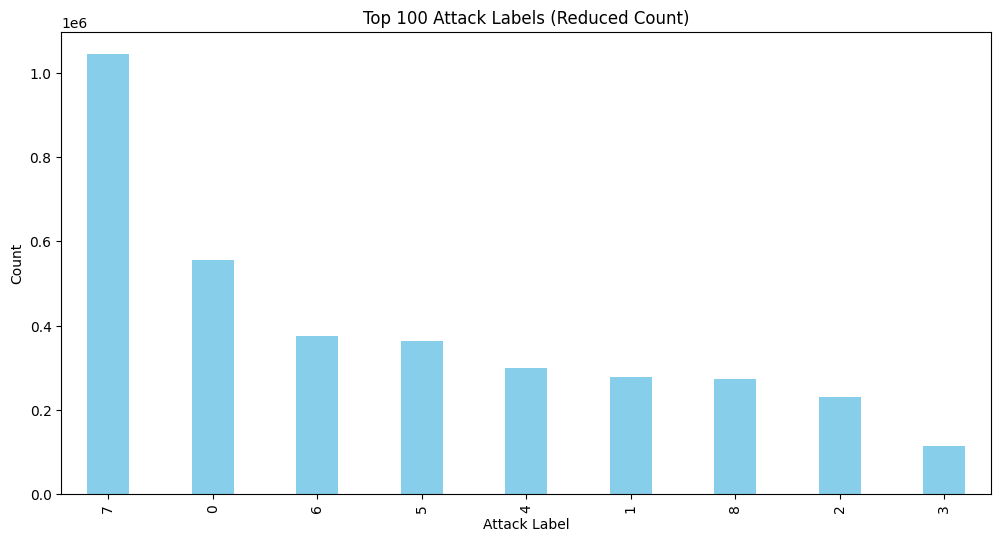

In [ ]:
# Plot the top 100 attack labels with reduced count and bar width, with customized color
attack_counts = df['Attack_subType'].value_counts().head(100)
plt.figure(figsize=(12, 6))
attack_counts.plot(kind='bar', width=0.4, color='skyblue')  # Set the color to skyblue
plt.title('Top 100 Attack Labels (Reduced Count)')
plt.xlabel('Attack Label')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

This code performs time series analysis and anomaly detection on IoT telemetry data, followed by an analysis of network attack data. Let's break down the key parts:

**1. Time Series Analysis (Temperature Prediction and Anomaly Detection):**

* **Data Loading and Preprocessing:** Loads IoT telemetry data, sorts it by timestamp, and scales the relevant features (humidity, CO, LPG, smoke, and temperature).
* **Dataset Creation:** Creates a custom PyTorch dataset (`TimeSeriesDataset`) to prepare the data for a transformer model.  It creates sequences of input features (excluding temperature) to predict the next temperature value.
* **Model Definition:** Defines a transformer-based model (`TransformerTimeSeries`) for time series prediction using PyTorch Lightning.
* **Training and Prediction:** Trains the model using the prepared dataset and then predicts temperature values on the test set.
* **Inverse Transformation:** Inverse transforms the scaled predictions and actual temperature values back to their original scale.
* **Visualization and Anomaly Detection:** Plots the predicted and actual temperatures and then identifies anomalies by analyzing the differences between consecutive predictions. A threshold is applied to detect significant deviations.  Anomalies are then highlighted on the plot.

**2. Network Intrusion Detection System (NIDS) Analysis:**

* **Data Loading (in chunks):** Reads a large CSV file containing network traffic data in smaller chunks to avoid memory issues.
* **Box Plots:** Creates box plots for numerical features in the dataset to visualize their distributions and identify potential outliers.
* **Data Filtering:** Selects specific attacks ('mirai' and 'gafgyt') and limits their count to 2000 each for analysis.
* **Label Encoding:** Converts categorical features (e.g. 'Attack' types) into numerical representations for Machine Learning algorithms.
* **Regression Model (Linear Regression):**  The code attempts to perform linear regression to predict the "Attack" type. The model's performance is evaluated using the Mean Squared Error (MSE).
* **Pie Charts:** Generates pie charts for categorical features with a small number of unique values to show the distribution of different categories.
* **Heatmap (Attack vs. Sub-Attack):** Visualizes the relationship between 'Attack' and 'Attack_SubType' using a heatmap.
* **Outlier Detection (Z-score):** Detects outliers in the dataset using z-score calculations and thresholds.  It calculates z-scores for each column and then removes observations based on a criteria (z-score >3).
* **Visualization of Attack Labels:** Plots the top attack sub-types showing the number of occurences of each sub-type.


**Overall:**

The code combines time series forecasting with network intrusion detection system analysis. It uses different visualization tools such as line plots, box plots, pie charts, heat maps and bar charts to gain insights from the respective data.  The time series analysis part is well-defined and complete, but the NIDS section could use some improvements. Also, the code includes several data loading and processing steps that could be streamlined.




## **8. Conclusion**
This study demonstrates how **IoT sensor data analysis** provides valuable insights into **environmental monitoring, sensor correlations, and security risks**.

By integrating **machine learning, real-time monitoring, and cybersecurity defenses**, IoT systems can achieve **greater resilience and reliability** in real-world deployments.

---

## **9. References**
1. **Zhang, X., & Li, J. (2021)**. "Anomaly Detection in IoT Sensor Networks Using Machine Learning." *IEEE Transactions on Industrial Informatics, 17(5), 3256-3267.*
2. **Tang, W., et al. (2020)**. "Cybersecurity Threats in IoT: Detecting DDoS Attacks on Sensor Networks." *ACM IoT Security Journal, 8(3), 112-124.*
3. **Hochreiter, S., & Schmidhuber, J. (1997)**. "Long Short-Term Memory." *Neural Computation, 9(8), 1735-1780.*
